# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 23:42:13.613587: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T23:42:17.666344
2025-04-14 23:42:17.666344


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 8
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 246
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 23:42:10"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

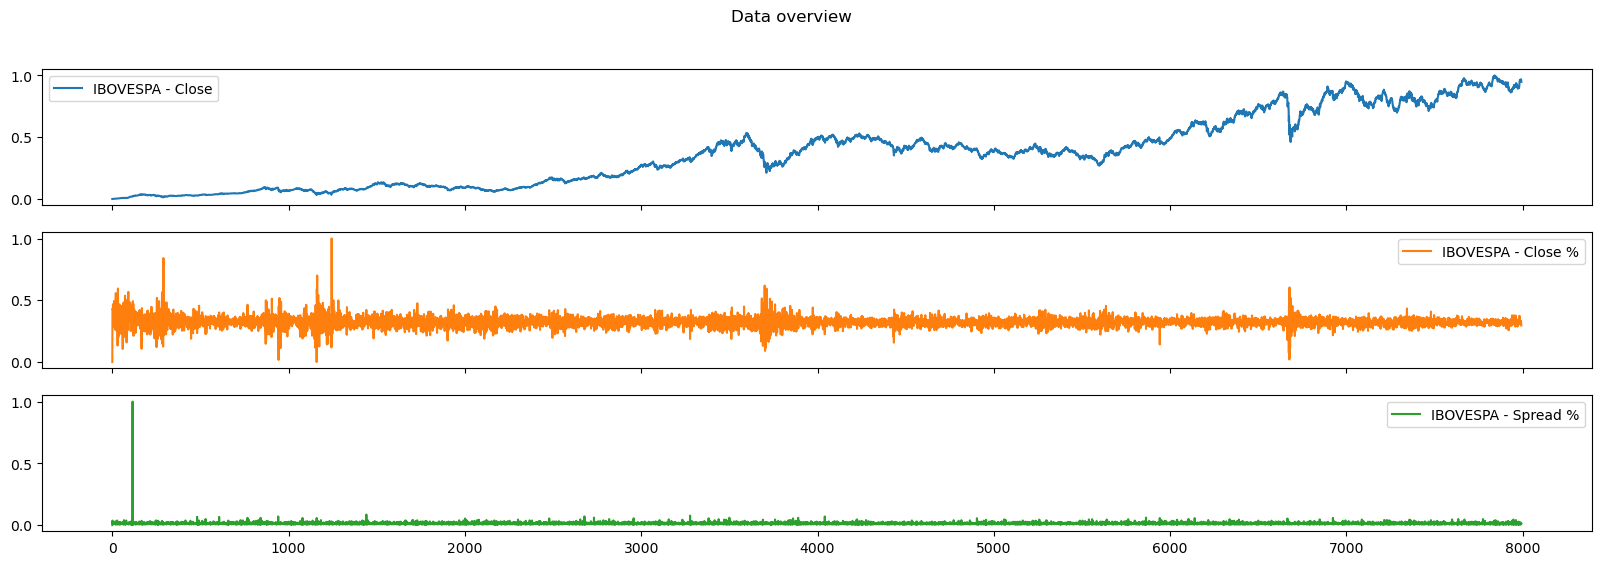

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

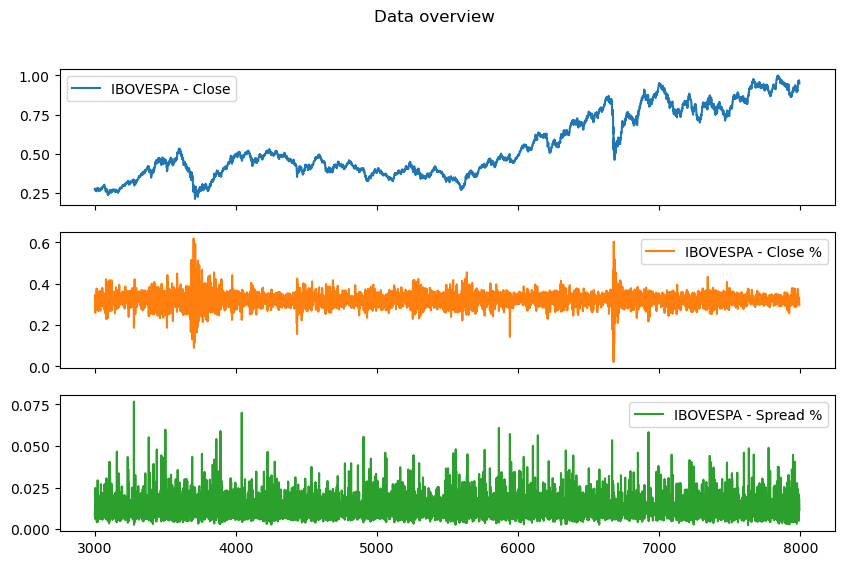

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

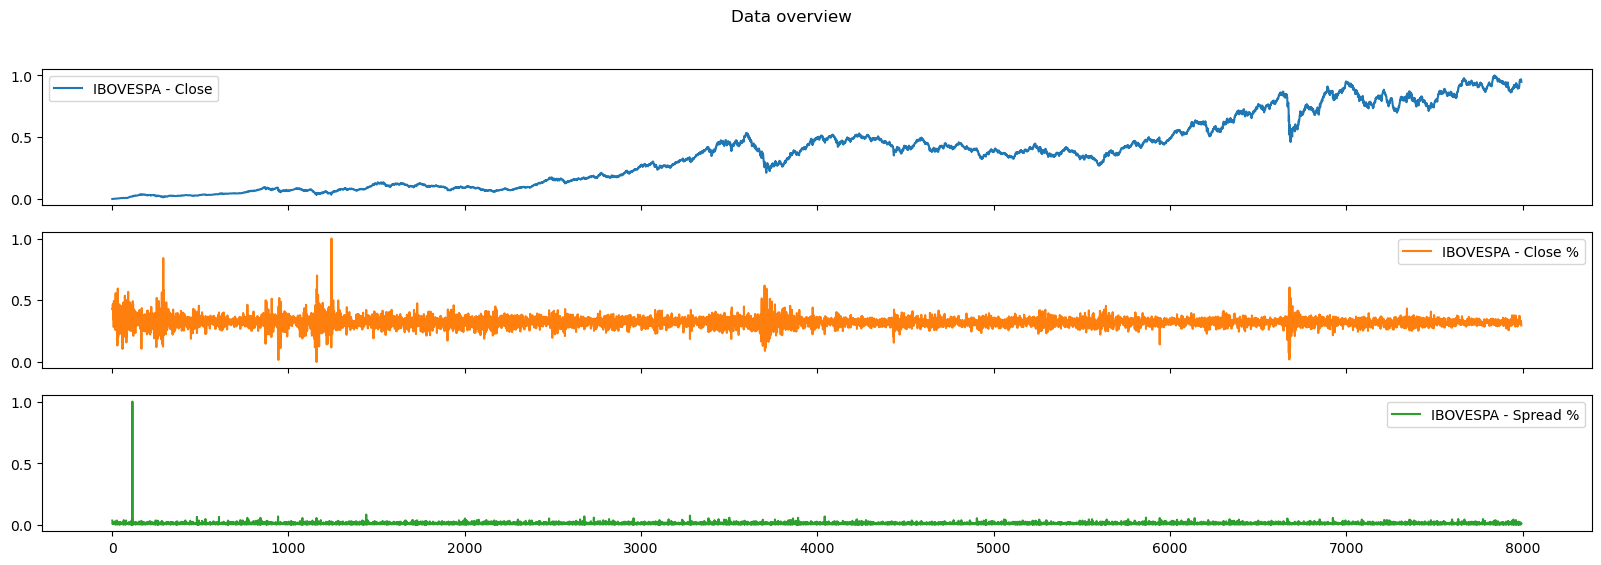

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

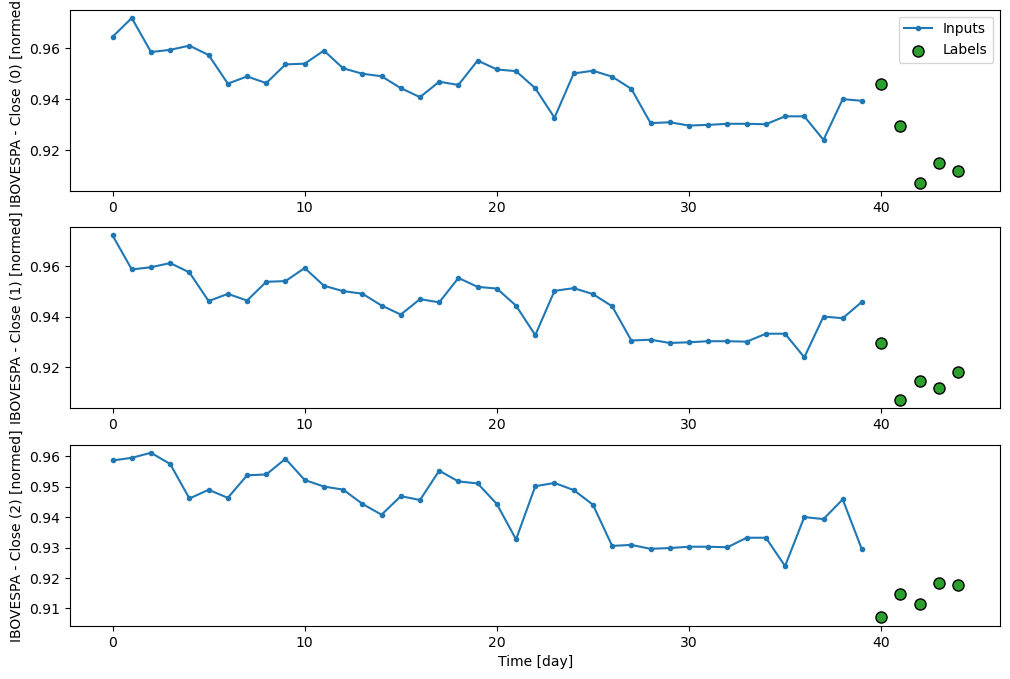

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

3

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9:14 2s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 119.1948 - mean_squared_error: 1.7210e-04 - root_mean_squared_error: 0.0126

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 105.0753 - mean_squared_error: 1.7429e-04 - root_mean_squared_error: 0.0129

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 87.9278 - mean_squared_error: 1.5514e-04 - root_mean_squared_error: 0.0122 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 77.1581 - mean_squared_error: 1.3942e-04 - root_mean_squared_error: 0.0116

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 71.7600 - mean_squared_error: 1.3098e-04 - root_mean_squared_error: 0.0112

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 67.5319 - mean_squared_error: 1.2452e-04 - root_mean_squared_error: 0.0109

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 63.8678 - mean_squared_error: 1.1862e-04 - root_mean_squared_error: 0.0107

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 60.6128 - mean_squared_error: 1.1317e-04 - root_mean_squared_error: 0.0104

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 56.3576 - mean_squared_error: 1.0581e-04 - root_mean_squared_error: 0.0100

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 53.9271 - mean_squared_error: 1.0177e-04 - root_mean_squared_error: 0.0098

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 51.7571 - mean_squared_error: 9.8335e-05 - root_mean_squared_error: 0.0096

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 48.9197 - mean_squared_error: 9.4355e-05 - root_mean_squared_error: 0.0094

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 47.2601 - mean_squared_error: 9.2196e-05 - root_mean_squared_error: 0.0093

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 45.0669 - mean_squared_error: 9.0040e-05 - root_mean_squared_error: 0.0092

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 43.3217 - mean_squared_error: 9.0845e-05 - root_mean_squared_error: 0.0093

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 42.3425 - mean_squared_error: 9.2176e-05 - root_mean_squared_error: 0.0094

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 41.0458 - mean_squared_error: 9.5213e-05 - root_mean_squared_error: 0.0095

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 39.8930 - mean_squared_error: 9.8432e-05 - root_mean_squared_error: 0.0097

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 39.2233 - mean_squared_error: 1.0790e-04 - root_mean_squared_error: 0.0100

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 38.3519 - mean_squared_error: 1.3097e-04 - root_mean_squared_error: 0.0108

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 37.8011 - mean_squared_error: 1.4432e-04 - root_mean_squared_error: 0.0112

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 37.2686 - mean_squared_error: 1.5615e-04 - root_mean_squared_error: 0.0116

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.5137 - mean_squared_error: 1.7172e-04 - root_mean_squared_error: 0.0121

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.0445 - mean_squared_error: 1.8095e-04 - root_mean_squared_error: 0.0124

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.5959 - mean_squared_error: 1.8930e-04 - root_mean_squared_error: 0.0127

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.9580 - mean_squared_error: 2.0039e-04 - root_mean_squared_error: 0.0130

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.5627 - mean_squared_error: 2.0706e-04 - root_mean_squared_error: 0.0133

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 34.0242 - mean_squared_error: 2.1639e-04 - root_mean_squared_error: 0.0136

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 33.6779 - mean_squared_error: 2.2186e-04 - root_mean_squared_error: 0.0138

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 33.3544 - mean_squared_error: 2.2722e-04 - root_mean_squared_error: 0.0139

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 33.0572 - mean_squared_error: 2.3316e-04 - root_mean_squared_error: 0.0141

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 32.7881 - mean_squared_error: 2.4102e-04 - root_mean_squared_error: 0.0144

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 32.5360 - mean_squared_error: 2.4965e-04 - root_mean_squared_error: 0.0146

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 32.2936 - mean_squared_error: 2.5801e-04 - root_mean_squared_error: 0.0149

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 32.0537 - mean_squared_error: 2.6571e-04 - root_mean_squared_error: 0.0151

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 31.8173 - mean_squared_error: 2.7288e-04 - root_mean_squared_error: 0.0153

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 31.5839 - mean_squared_error: 2.7959e-04 - root_mean_squared_error: 0.0155

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 31.3591 - mean_squared_error: 2.8630e-04 - root_mean_squared_error: 0.0157

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 31.0311 - mean_squared_error: 2.9598e-04 - root_mean_squared_error: 0.0159

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 30.8237 - mean_squared_error: 3.0352e-04 - root_mean_squared_error: 0.0162

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 30.6219 - mean_squared_error: 3.1130e-04 - root_mean_squared_error: 0.0164

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 30.4233 - mean_squared_error: 3.1874e-04 - root_mean_squared_error: 0.0166

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 30.2268 - mean_squared_error: 3.2582e-04 - root_mean_squared_error: 0.0167

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 30.0332 - mean_squared_error: 3.3265e-04 - root_mean_squared_error: 0.0169

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 29.8407 - mean_squared_error: 3.3906e-04 - root_mean_squared_error: 0.0171

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 29.5570 - mean_squared_error: 3.4855e-04 - root_mean_squared_error: 0.0173

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 29.3716 - mean_squared_error: 3.5500e-04 - root_mean_squared_error: 0.0175

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 29.0964 - mean_squared_error: 3.6413e-04 - root_mean_squared_error: 0.0177

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 28.8359 - mean_squared_error: 3.7722e-04 - root_mean_squared_error: 0.0181

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 28.6779 - mean_squared_error: 3.9057e-04 - root_mean_squared_error: 0.0183

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 28.4488 - mean_squared_error: 4.1111e-04 - root_mean_squared_error: 0.0187

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 28.3068 - mean_squared_error: 4.2963e-04 - root_mean_squared_error: 0.0191

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 28.1759 - mean_squared_error: 4.5852e-04 - root_mean_squared_error: 0.0195

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 27.9992 - mean_squared_error: 5.2279e-04 - root_mean_squared_error: 0.0204

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 27.8896 - mean_squared_error: 5.7122e-04 - root_mean_squared_error: 0.0210

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 27.7807 - mean_squared_error: 6.1804e-04 - root_mean_squared_error: 0.0216

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 27.6714 - mean_squared_error: 6.6278e-04 - root_mean_squared_error: 0.0222

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 27.5062 - mean_squared_error: 7.2608e-04 - root_mean_squared_error: 0.0230

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 27.3429 - mean_squared_error: 7.8588e-04 - root_mean_squared_error: 0.0238

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 27.2351 - mean_squared_error: 8.2388e-04 - root_mean_squared_error: 0.0243

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 27.0782 - mean_squared_error: 8.8031e-04 - root_mean_squared_error: 0.0250

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 26.9218 - mean_squared_error: 9.3362e-04 - root_mean_squared_error: 0.0257

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 26.8177 - mean_squared_error: 9.6728e-04 - root_mean_squared_error: 0.0262

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 26.7141 - mean_squared_error: 9.9961e-04 - root_mean_squared_error: 0.0266

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 26.6117 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0270    

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 26.4602 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0276

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 26.3096 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0282

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 26.2102 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0285

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 26.0637 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0290

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 25.9191 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0295

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 25.8234 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0299

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 25.6817 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0303

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 25.5890 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0306

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 25.4977 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0309

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 25.3647 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0313

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 25.2800 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0316

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 25.1983 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0319

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 25.1193 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0322

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 25.0421 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0325

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 24.9293 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0330

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 24.8549 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0333

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 24.7822 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0335

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 24.7111 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0338

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 24.6402 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0341

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 24.5703 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0344

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 24.5013 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0347

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 24.4327 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 24.3639 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0352

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 24.2962 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0355

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 24.2314 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0358

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 24.1668 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 24.1027 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0364

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 24.0400 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0367

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 23.9788 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0370

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 23.9189 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0373

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 23.8592 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0377

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 23.7995 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0380

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 23.7399 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0383

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 23.6806 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0386

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 23.6215 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0389

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 23.5624 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0392

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 23.5033 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0394

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 23.4152 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0398

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 23.3862 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0400 - val_loss: 0.0532 - val_mean_absolute_error: 0.0532 - val_mean_absolute_percentage_error: 5.6192 - val_mean_squared_error: 0.0034 - val_root_mean_squared_error: 0.0585 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.6526 - mean_absolute_error: 0.6526 - mean_absolute_percentage_error: 8668.4521 - mean_squared_error: 0.4260 - root_mean_squared_error: 0.6527

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.6544 - mean_absolute_error: 0.6544 - mean_absolute_percentage_error: 7249.8604 - mean_squared_error: 0.4284 - root_mean_squared_error: 0.6545 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6443 - mean_absolute_error: 0.6443 - mean_absolute_percentage_error: 5760.1948 - mean_squared_error: 0.4158 - root_mean_squared_error: 0.6447

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6321 - mean_absolute_error: 0.6321 - mean_absolute_percentage_error: 5182.2363 - mean_squared_error: 0.4016 - root_mean_squared_error: 0.6333

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6314 - mean_absolute_error: 0.6314 - mean_absolute_percentage_error: 4825.9170 - mean_squared_error: 0.4225 - root_mean_squared_error: 0.6465

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6324 - mean_absolute_error: 0.6324 - mean_absolute_percentage_error: 4566.7720 - mean_squared_error: 0.4536 - root_mean_squared_error: 0.6687

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6251 - mean_absolute_error: 0.6251 - mean_absolute_percentage_error: 4240.7485 - mean_squared_error: 0.4744 - root_mean_squared_error: 0.6843

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6218 - mean_absolute_error: 0.6218 - mean_absolute_percentage_error: 3995.4043 - mean_squared_error: 0.4885 - root_mean_squared_error: 0.6948

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6157 - mean_absolute_error: 0.6157 - mean_absolute_percentage_error: 3844.8821 - mean_squared_error: 0.4896 - root_mean_squared_error: 0.6961

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6050 - mean_absolute_error: 0.6050 - mean_absolute_percentage_error: 3641.5024 - mean_squared_error: 0.4859 - root_mean_squared_error: 0.6938

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5942 - mean_absolute_error: 0.5942 - mean_absolute_percentage_error: 3460.9648 - mean_squared_error: 0.4790 - root_mean_squared_error: 0.6891

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5873 - mean_absolute_error: 0.5873 - mean_absolute_percentage_error: 3351.3423 - mean_squared_error: 0.4735 - root_mean_squared_error: 0.6852

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5776 - mean_absolute_error: 0.5776 - mean_absolute_percentage_error: 3202.2188 - mean_squared_error: 0.4650 - root_mean_squared_error: 0.6789

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5682 - mean_absolute_error: 0.5682 - mean_absolute_percentage_error: 3068.0967 - mean_squared_error: 0.4558 - root_mean_squared_error: 0.6720

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5620 - mean_absolute_error: 0.5620 - mean_absolute_percentage_error: 2986.3066 - mean_squared_error: 0.4496 - root_mean_squared_error: 0.6673

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5525 - mean_absolute_error: 0.5525 - mean_absolute_percentage_error: 2873.1250 - mean_squared_error: 0.4400 - root_mean_squared_error: 0.6598

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5434 - mean_absolute_error: 0.5434 - mean_absolute_percentage_error: 2769.9331 - mean_squared_error: 0.4304 - root_mean_squared_error: 0.6522

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5375 - mean_absolute_error: 0.5375 - mean_absolute_percentage_error: 2705.8984 - mean_squared_error: 0.4241 - root_mean_squared_error: 0.6471

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5288 - mean_absolute_error: 0.5288 - mean_absolute_percentage_error: 2616.0757 - mean_squared_error: 0.4148 - root_mean_squared_error: 0.6395

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5204 - mean_absolute_error: 0.5204 - mean_absolute_percentage_error: 2532.8140 - mean_squared_error: 0.4058 - root_mean_squared_error: 0.6319

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5148 - mean_absolute_error: 0.5148 - mean_absolute_percentage_error: 2480.5989 - mean_squared_error: 0.3999 - root_mean_squared_error: 0.6270

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5069 - mean_absolute_error: 0.5069 - mean_absolute_percentage_error: 2406.9177 - mean_squared_error: 0.3914 - root_mean_squared_error: 0.6197

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5017 - mean_absolute_error: 0.5017 - mean_absolute_percentage_error: 2360.5469 - mean_squared_error: 0.3859 - root_mean_squared_error: 0.6149

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4965 - mean_absolute_error: 0.4965 - mean_absolute_percentage_error: 2316.1919 - mean_squared_error: 0.3805 - root_mean_squared_error: 0.6102

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4915 - mean_absolute_error: 0.4915 - mean_absolute_percentage_error: 2273.8186 - mean_squared_error: 0.3752 - root_mean_squared_error: 0.6056

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4866 - mean_absolute_error: 0.4866 - mean_absolute_percentage_error: 2233.2314 - mean_squared_error: 0.3701 - root_mean_squared_error: 0.6011

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4819 - mean_absolute_error: 0.4819 - mean_absolute_percentage_error: 2194.3545 - mean_squared_error: 0.3652 - root_mean_squared_error: 0.5967

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4772 - mean_absolute_error: 0.4772 - mean_absolute_percentage_error: 2157.1062 - mean_squared_error: 0.3603 - root_mean_squared_error: 0.5923

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4749 - mean_absolute_error: 0.4749 - mean_absolute_percentage_error: 2139.0674 - mean_squared_error: 0.3580 - root_mean_squared_error: 0.5902

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4726 - mean_absolute_error: 0.4726 - mean_absolute_percentage_error: 2121.4104 - mean_squared_error: 0.3556 - root_mean_squared_error: 0.5881

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4683 - mean_absolute_error: 0.4683 - mean_absolute_percentage_error: 2087.1711 - mean_squared_error: 0.3511 - root_mean_squared_error: 0.5839

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4640 - mean_absolute_error: 0.4640 - mean_absolute_percentage_error: 2054.2856 - mean_squared_error: 0.3467 - root_mean_squared_error: 0.5799

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4598 - mean_absolute_error: 0.4598 - mean_absolute_percentage_error: 2022.5865 - mean_squared_error: 0.3424 - root_mean_squared_error: 0.5759

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4558 - mean_absolute_error: 0.4558 - mean_absolute_percentage_error: 1992.0221 - mean_squared_error: 0.3383 - root_mean_squared_error: 0.5720

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4518 - mean_absolute_error: 0.4518 - mean_absolute_percentage_error: 1962.4991 - mean_squared_error: 0.3342 - root_mean_squared_error: 0.5682

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4460 - mean_absolute_error: 0.4460 - mean_absolute_percentage_error: 1920.0648 - mean_squared_error: 0.3283 - root_mean_squared_error: 0.5627

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4422 - mean_absolute_error: 0.4422 - mean_absolute_percentage_error: 1892.9330 - mean_squared_error: 0.3245 - root_mean_squared_error: 0.5590

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4385 - mean_absolute_error: 0.4385 - mean_absolute_percentage_error: 1866.6718 - mean_squared_error: 0.3208 - root_mean_squared_error: 0.5555

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4349 - mean_absolute_error: 0.4349 - mean_absolute_percentage_error: 1841.2345 - mean_squared_error: 0.3171 - root_mean_squared_error: 0.5520

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4314 - mean_absolute_error: 0.4314 - mean_absolute_percentage_error: 1816.5907 - mean_squared_error: 0.3136 - root_mean_squared_error: 0.5485

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4279 - mean_absolute_error: 0.4279 - mean_absolute_percentage_error: 1792.6901 - mean_squared_error: 0.3102 - root_mean_squared_error: 0.5452

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4245 - mean_absolute_error: 0.4245 - mean_absolute_percentage_error: 1769.4965 - mean_squared_error: 0.3068 - root_mean_squared_error: 0.5419

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4212 - mean_absolute_error: 0.4212 - mean_absolute_percentage_error: 1746.9786 - mean_squared_error: 0.3035 - root_mean_squared_error: 0.5386

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4179 - mean_absolute_error: 0.4179 - mean_absolute_percentage_error: 1725.1040 - mean_squared_error: 0.3003 - root_mean_squared_error: 0.5355

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4147 - mean_absolute_error: 0.4147 - mean_absolute_percentage_error: 1703.8478 - mean_squared_error: 0.2972 - root_mean_squared_error: 0.5323

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4100 - mean_absolute_error: 0.4100 - mean_absolute_percentage_error: 1673.0627 - mean_squared_error: 0.2926 - root_mean_squared_error: 0.5278

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4070 - mean_absolute_error: 0.4070 - mean_absolute_percentage_error: 1653.2366 - mean_squared_error: 0.2897 - root_mean_squared_error: 0.5248

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4040 - mean_absolute_error: 0.4040 - mean_absolute_percentage_error: 1633.9426 - mean_squared_error: 0.2868 - root_mean_squared_error: 0.5219

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3997 - mean_absolute_error: 0.3997 - mean_absolute_percentage_error: 1605.9436 - mean_squared_error: 0.2827 - root_mean_squared_error: 0.5176

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3969 - mean_absolute_error: 0.3969 - mean_absolute_percentage_error: 1587.8793 - mean_squared_error: 0.2800 - root_mean_squared_error: 0.5149

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3928 - mean_absolute_error: 0.3928 - mean_absolute_percentage_error: 1561.6425 - mean_squared_error: 0.2760 - root_mean_squared_error: 0.5108

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3902 - mean_absolute_error: 0.3902 - mean_absolute_percentage_error: 1544.7037 - mean_squared_error: 0.2735 - root_mean_squared_error: 0.5082

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3877 - mean_absolute_error: 0.3877 - mean_absolute_percentage_error: 1528.1982 - mean_squared_error: 0.2710 - root_mean_squared_error: 0.5056

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3840 - mean_absolute_error: 0.3840 - mean_absolute_percentage_error: 1504.2015 - mean_squared_error: 0.2675 - root_mean_squared_error: 0.5019

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3816 - mean_absolute_error: 0.3816 - mean_absolute_percentage_error: 1488.6793 - mean_squared_error: 0.2652 - root_mean_squared_error: 0.4995

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3794 - mean_absolute_error: 0.3794 - mean_absolute_percentage_error: 1473.5258 - mean_squared_error: 0.2629 - root_mean_squared_error: 0.4972

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3771 - mean_absolute_error: 0.3771 - mean_absolute_percentage_error: 1458.7280 - mean_squared_error: 0.2607 - root_mean_squared_error: 0.4949

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3740 - mean_absolute_error: 0.3740 - mean_absolute_percentage_error: 1437.1821 - mean_squared_error: 0.2576 - root_mean_squared_error: 0.4917

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3710 - mean_absolute_error: 0.3710 - mean_absolute_percentage_error: 1416.3533 - mean_squared_error: 0.2546 - root_mean_squared_error: 0.4885

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3690 - mean_absolute_error: 0.3690 - mean_absolute_percentage_error: 1402.8489 - mean_squared_error: 0.2527 - root_mean_squared_error: 0.4864

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3661 - mean_absolute_error: 0.3661 - mean_absolute_percentage_error: 1383.1373 - mean_squared_error: 0.2498 - root_mean_squared_error: 0.4834

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3633 - mean_absolute_error: 0.3633 - mean_absolute_percentage_error: 1364.0522 - mean_squared_error: 0.2470 - root_mean_squared_error: 0.4805

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3614 - mean_absolute_error: 0.3614 - mean_absolute_percentage_error: 1351.6632 - mean_squared_error: 0.2452 - root_mean_squared_error: 0.4785

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3588 - mean_absolute_error: 0.3588 - mean_absolute_percentage_error: 1333.5579 - mean_squared_error: 0.2425 - root_mean_squared_error: 0.4757

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3570 - mean_absolute_error: 0.3570 - mean_absolute_percentage_error: 1321.7953 - mean_squared_error: 0.2408 - root_mean_squared_error: 0.4738

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3553 - mean_absolute_error: 0.3553 - mean_absolute_percentage_error: 1310.2697 - mean_squared_error: 0.2391 - root_mean_squared_error: 0.4720

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3527 - mean_absolute_error: 0.3527 - mean_absolute_percentage_error: 1293.4121 - mean_squared_error: 0.2366 - root_mean_squared_error: 0.4693

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3511 - mean_absolute_error: 0.3511 - mean_absolute_percentage_error: 1282.4495 - mean_squared_error: 0.2350 - root_mean_squared_error: 0.4675

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3495 - mean_absolute_error: 0.3495 - mean_absolute_percentage_error: 1271.7003 - mean_squared_error: 0.2334 - root_mean_squared_error: 0.4657

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3471 - mean_absolute_error: 0.3471 - mean_absolute_percentage_error: 1255.9604 - mean_squared_error: 0.2310 - root_mean_squared_error: 0.4632

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3455 - mean_absolute_error: 0.3455 - mean_absolute_percentage_error: 1245.7129 - mean_squared_error: 0.2295 - root_mean_squared_error: 0.4615

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3432 - mean_absolute_error: 0.3432 - mean_absolute_percentage_error: 1230.6945 - mean_squared_error: 0.2272 - root_mean_squared_error: 0.4590

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3417 - mean_absolute_error: 0.3417 - mean_absolute_percentage_error: 1220.9098 - mean_squared_error: 0.2257 - root_mean_squared_error: 0.4573

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3402 - mean_absolute_error: 0.3402 - mean_absolute_percentage_error: 1211.3016 - mean_squared_error: 0.2243 - root_mean_squared_error: 0.4557

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3380 - mean_absolute_error: 0.3380 - mean_absolute_percentage_error: 1197.2115 - mean_squared_error: 0.2221 - root_mean_squared_error: 0.4533

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3365 - mean_absolute_error: 0.3365 - mean_absolute_percentage_error: 1188.0251 - mean_squared_error: 0.2207 - root_mean_squared_error: 0.4517

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3343 - mean_absolute_error: 0.3343 - mean_absolute_percentage_error: 1174.5464 - mean_squared_error: 0.2186 - root_mean_squared_error: 0.4494

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3322 - mean_absolute_error: 0.3322 - mean_absolute_percentage_error: 1161.4131 - mean_squared_error: 0.2166 - root_mean_squared_error: 0.4471

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3308 - mean_absolute_error: 0.3308 - mean_absolute_percentage_error: 1152.8430 - mean_squared_error: 0.2153 - root_mean_squared_error: 0.4456

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3288 - mean_absolute_error: 0.3288 - mean_absolute_percentage_error: 1140.2551 - mean_squared_error: 0.2134 - root_mean_squared_error: 0.4433

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3268 - mean_absolute_error: 0.3268 - mean_absolute_percentage_error: 1127.9767 - mean_squared_error: 0.2114 - root_mean_squared_error: 0.4411

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3254 - mean_absolute_error: 0.3254 - mean_absolute_percentage_error: 1119.9567 - mean_squared_error: 0.2102 - root_mean_squared_error: 0.4397

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3235 - mean_absolute_error: 0.3235 - mean_absolute_percentage_error: 1108.1671 - mean_squared_error: 0.2083 - root_mean_squared_error: 0.4376

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3216 - mean_absolute_error: 0.3216 - mean_absolute_percentage_error: 1096.6580 - mean_squared_error: 0.2065 - root_mean_squared_error: 0.4355

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3203 - mean_absolute_error: 0.3203 - mean_absolute_percentage_error: 1089.1359 - mean_squared_error: 0.2054 - root_mean_squared_error: 0.4341

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3184 - mean_absolute_error: 0.3184 - mean_absolute_percentage_error: 1078.0702 - mean_squared_error: 0.2036 - root_mean_squared_error: 0.4320

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3172 - mean_absolute_error: 0.3172 - mean_absolute_percentage_error: 1070.8339 - mean_squared_error: 0.2025 - root_mean_squared_error: 0.4307

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3160 - mean_absolute_error: 0.3160 - mean_absolute_percentage_error: 1063.7072 - mean_squared_error: 0.2013 - root_mean_squared_error: 0.4294

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3142 - mean_absolute_error: 0.3142 - mean_absolute_percentage_error: 1053.2192 - mean_squared_error: 0.1997 - root_mean_squared_error: 0.4274

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3131 - mean_absolute_error: 0.3131 - mean_absolute_percentage_error: 1046.3588 - mean_squared_error: 0.1986 - root_mean_squared_error: 0.4261

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3114 - mean_absolute_error: 0.3114 - mean_absolute_percentage_error: 1036.2579 - mean_squared_error: 0.1970 - root_mean_squared_error: 0.4242

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3103 - mean_absolute_error: 0.3103 - mean_absolute_percentage_error: 1029.6466 - mean_squared_error: 0.1960 - root_mean_squared_error: 0.4230

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3092 - mean_absolute_error: 0.3092 - mean_absolute_percentage_error: 1023.1306 - mean_squared_error: 0.1949 - root_mean_squared_error: 0.4218

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3081 - mean_absolute_error: 0.3081 - mean_absolute_percentage_error: 1016.7075 - mean_squared_error: 0.1939 - root_mean_squared_error: 0.4206

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3070 - mean_absolute_error: 0.3070 - mean_absolute_percentage_error: 1010.3755 - mean_squared_error: 0.1929 - root_mean_squared_error: 0.4194

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3060 - mean_absolute_error: 0.3060 - mean_absolute_percentage_error: 1004.1326 - mean_squared_error: 0.1919 - root_mean_squared_error: 0.4182

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3049 - mean_absolute_error: 0.3049 - mean_absolute_percentage_error: 997.9772 - mean_squared_error: 0.1910 - root_mean_squared_error: 0.4170 

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3034 - mean_absolute_error: 0.3034 - mean_absolute_percentage_error: 988.9033 - mean_squared_error: 0.1895 - root_mean_squared_error: 0.4153

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3024 - mean_absolute_error: 0.3024 - mean_absolute_percentage_error: 982.9574 - mean_squared_error: 0.1886 - root_mean_squared_error: 0.4141

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3009 - mean_absolute_error: 0.3009 - mean_absolute_percentage_error: 974.1892 - mean_squared_error: 0.1872 - root_mean_squared_error: 0.4124

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2994 - mean_absolute_error: 0.2994 - mean_absolute_percentage_error: 965.6006 - mean_squared_error: 0.1858 - root_mean_squared_error: 0.4108

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2989 - mean_absolute_error: 0.2989 - mean_absolute_percentage_error: 962.7834 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.4102 - val_loss: 0.0576 - val_mean_absolute_error: 0.0576 - val_mean_absolute_percentage_error: 6.1270 - val_mean_squared_error: 0.0045 - val_root_mean_squared_error: 0.0668 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.8938 - mean_absolute_error: 0.8938 - mean_absolute_percentage_error: 11875.8301 - mean_squared_error: 0.8011 - root_mean_squared_error: 0.8950

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.8456 - mean_absolute_error: 0.8456 - mean_absolute_percentage_error: 9603.8164 - mean_squared_error: 0.7276 - root_mean_squared_error: 0.8522  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7712 - mean_absolute_error: 0.7712 - mean_absolute_percentage_error: 7898.8086 - mean_squared_error: 0.6380 - root_mean_squared_error: 0.7949

  6/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7334 - mean_absolute_error: 0.7334 - mean_absolute_percentage_error: 7270.3853 - mean_squared_error: 0.5973 - root_mean_squared_error: 0.7670

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.6729 - mean_absolute_error: 0.6729 - mean_absolute_percentage_error: 6339.0698 - mean_squared_error: 0.5310 - root_mean_squared_error: 0.7193

 10/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6286 - mean_absolute_error: 0.6286 - mean_absolute_percentage_error: 5688.7676 - mean_squared_error: 0.4814 - root_mean_squared_error: 0.6818

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5920 - mean_absolute_error: 0.5920 - mean_absolute_percentage_error: 5188.6870 - mean_squared_error: 0.4419 - root_mean_squared_error: 0.6506

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.5761 - mean_absolute_error: 0.5761 - mean_absolute_percentage_error: 4978.5005 - mean_squared_error: 0.4250 - root_mean_squared_error: 0.6368

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.5487 - mean_absolute_error: 0.5487 - mean_absolute_percentage_error: 4619.8433 - mean_squared_error: 0.3959 - root_mean_squared_error: 0.6125

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.5255 - mean_absolute_error: 0.5255 - mean_absolute_percentage_error: 4321.7446 - mean_squared_error: 0.3715 - root_mean_squared_error: 0.5915

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5046 - mean_absolute_error: 0.5046 - mean_absolute_percentage_error: 4066.4807 - mean_squared_error: 0.3504 - root_mean_squared_error: 0.5728

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.4863 - mean_absolute_error: 0.4863 - mean_absolute_percentage_error: 3845.8762 - mean_squared_error: 0.3321 - root_mean_squared_error: 0.5561

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.4701 - mean_absolute_error: 0.4701 - mean_absolute_percentage_error: 3652.8208 - mean_squared_error: 0.3160 - root_mean_squared_error: 0.5411

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4551 - mean_absolute_error: 0.4551 - mean_absolute_percentage_error: 3480.9551 - mean_squared_error: 0.3016 - root_mean_squared_error: 0.5273

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4416 - mean_absolute_error: 0.4416 - mean_absolute_percentage_error: 3327.2332 - mean_squared_error: 0.2888 - root_mean_squared_error: 0.5148

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4293 - mean_absolute_error: 0.4293 - mean_absolute_percentage_error: 3188.6711 - mean_squared_error: 0.2773 - root_mean_squared_error: 0.5034

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4180 - mean_absolute_error: 0.4180 - mean_absolute_percentage_error: 3063.0459 - mean_squared_error: 0.2668 - root_mean_squared_error: 0.4927

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4076 - mean_absolute_error: 0.4076 - mean_absolute_percentage_error: 2948.8010 - mean_squared_error: 0.2573 - root_mean_squared_error: 0.4830

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.3980 - mean_absolute_error: 0.3980 - mean_absolute_percentage_error: 2844.2693 - mean_squared_error: 0.2486 - root_mean_squared_error: 0.4739

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.3847 - mean_absolute_error: 0.3847 - mean_absolute_percentage_error: 2703.1082 - mean_squared_error: 0.2368 - root_mean_squared_error: 0.4613

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.3727 - mean_absolute_error: 0.3727 - mean_absolute_percentage_error: 2577.6692 - mean_squared_error: 0.2262 - root_mean_squared_error: 0.4498

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.3651 - mean_absolute_error: 0.3651 - mean_absolute_percentage_error: 2501.3113 - mean_squared_error: 0.2198 - root_mean_squared_error: 0.4427

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.3581 - mean_absolute_error: 0.3581 - mean_absolute_percentage_error: 2430.1008 - mean_squared_error: 0.2138 - root_mean_squared_error: 0.4360

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.3483 - mean_absolute_error: 0.3483 - mean_absolute_percentage_error: 2331.7571 - mean_squared_error: 0.2055 - root_mean_squared_error: 0.4266

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.3422 - mean_absolute_error: 0.3422 - mean_absolute_percentage_error: 2271.1475 - mean_squared_error: 0.2005 - root_mean_squared_error: 0.4207

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.3335 - mean_absolute_error: 0.3335 - mean_absolute_percentage_error: 2186.7854 - mean_squared_error: 0.1933 - root_mean_squared_error: 0.4124

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3281 - mean_absolute_error: 0.3281 - mean_absolute_percentage_error: 2134.4419 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.4072

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3228 - mean_absolute_error: 0.3228 - mean_absolute_percentage_error: 2084.8965 - mean_squared_error: 0.1847 - root_mean_squared_error: 0.4021

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3154 - mean_absolute_error: 0.3154 - mean_absolute_percentage_error: 2015.4075 - mean_squared_error: 0.1788 - root_mean_squared_error: 0.3949

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.3107 - mean_absolute_error: 0.3107 - mean_absolute_percentage_error: 1972.0206 - mean_squared_error: 0.1751 - root_mean_squared_error: 0.3904

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3040 - mean_absolute_error: 0.3040 - mean_absolute_percentage_error: 1910.8773 - mean_squared_error: 0.1699 - root_mean_squared_error: 0.3839

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.2998 - mean_absolute_error: 0.2998 - mean_absolute_percentage_error: 1872.5355 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3797

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2957 - mean_absolute_error: 0.2957 - mean_absolute_percentage_error: 1835.9503 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3757

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2918 - mean_absolute_error: 0.2918 - mean_absolute_percentage_error: 1800.9991 - mean_squared_error: 0.1605 - root_mean_squared_error: 0.3719

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2881 - mean_absolute_error: 0.2881 - mean_absolute_percentage_error: 1767.5714 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3681

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2844 - mean_absolute_error: 0.2844 - mean_absolute_percentage_error: 1735.5524 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3645

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2809 - mean_absolute_error: 0.2809 - mean_absolute_percentage_error: 1704.8414 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3610

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2775 - mean_absolute_error: 0.2775 - mean_absolute_percentage_error: 1675.3636 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3577

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1647.0271 - mean_squared_error: 0.1472 - root_mean_squared_error: 0.3544

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2711 - mean_absolute_error: 0.2711 - mean_absolute_percentage_error: 1619.7638 - mean_squared_error: 0.1449 - root_mean_squared_error: 0.3512

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2680 - mean_absolute_error: 0.2680 - mean_absolute_percentage_error: 1593.5052 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3481

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1568.1993 - mean_squared_error: 0.1404 - root_mean_squared_error: 0.3451

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2621 - mean_absolute_error: 0.2621 - mean_absolute_percentage_error: 1543.7960 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3422

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2593 - mean_absolute_error: 0.2593 - mean_absolute_percentage_error: 1520.2426 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3394

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2566 - mean_absolute_error: 0.2566 - mean_absolute_percentage_error: 1497.4906 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3366

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.2539 - mean_absolute_error: 0.2539 - mean_absolute_percentage_error: 1475.4961 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3339

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2513 - mean_absolute_error: 0.2513 - mean_absolute_percentage_error: 1454.2211 - mean_squared_error: 0.1305 - root_mean_squared_error: 0.3313

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2476 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 1423.5764 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3275

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2451 - mean_absolute_error: 0.2451 - mean_absolute_percentage_error: 1403.9451 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3250

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 1384.9169 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3226

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2404 - mean_absolute_error: 0.2404 - mean_absolute_percentage_error: 1366.4634 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3203

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 1348.5571 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3180

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 1331.1740 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3157

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1314.2898 - mean_squared_error: 0.1184 - root_mean_squared_error: 0.3136

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 1297.8837 - mean_squared_error: 0.1169 - root_mean_squared_error: 0.3114

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2299 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 1281.9409 - mean_squared_error: 0.1155 - root_mean_squared_error: 0.3094

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2279 - mean_absolute_error: 0.2279 - mean_absolute_percentage_error: 1266.4427 - mean_squared_error: 0.1142 - root_mean_squared_error: 0.3073

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2261 - mean_absolute_error: 0.2261 - mean_absolute_percentage_error: 1251.3723 - mean_squared_error: 0.1129 - root_mean_squared_error: 0.3054

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2243 - mean_absolute_error: 0.2243 - mean_absolute_percentage_error: 1236.7052 - mean_squared_error: 0.1116 - root_mean_squared_error: 0.3035

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2225 - mean_absolute_error: 0.2225 - mean_absolute_percentage_error: 1222.4226 - mean_squared_error: 0.1104 - root_mean_squared_error: 0.3016

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2208 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 1208.5098 - mean_squared_error: 0.1092 - root_mean_squared_error: 0.2998

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 1194.9503 - mean_squared_error: 0.1080 - root_mean_squared_error: 0.2980

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1181.7316 - mean_squared_error: 0.1069 - root_mean_squared_error: 0.2963

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 1162.5162 - mean_squared_error: 0.1053 - root_mean_squared_error: 0.2938

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2138 - mean_absolute_error: 0.2138 - mean_absolute_percentage_error: 1150.0936 - mean_squared_error: 0.1042 - root_mean_squared_error: 0.2922

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2123 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 1137.9697 - mean_squared_error: 0.1032 - root_mean_squared_error: 0.2906

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2109 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 1126.1348 - mean_squared_error: 0.1022 - root_mean_squared_error: 0.2890

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2095 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 1114.5767 - mean_squared_error: 0.1012 - root_mean_squared_error: 0.2875

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2082 - mean_absolute_error: 0.2082 - mean_absolute_percentage_error: 1103.2865 - mean_squared_error: 0.1002 - root_mean_squared_error: 0.2860

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2069 - mean_absolute_error: 0.2069 - mean_absolute_percentage_error: 1092.2546 - mean_squared_error: 0.0993 - root_mean_squared_error: 0.2846

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 1076.1699 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.2825

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2038 - mean_absolute_error: 0.2038 - mean_absolute_percentage_error: 1065.7426 - mean_squared_error: 0.0971 - root_mean_squared_error: 0.2811

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 1055.5424 - mean_squared_error: 0.0962 - root_mean_squared_error: 0.2798

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2014 - mean_absolute_error: 0.2014 - mean_absolute_percentage_error: 1045.5607 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2784

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2003 - mean_absolute_error: 0.2003 - mean_absolute_percentage_error: 1035.7904 - mean_squared_error: 0.0946 - root_mean_squared_error: 0.2771

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1986 - mean_absolute_error: 0.1986 - mean_absolute_percentage_error: 1021.5165 - mean_squared_error: 0.0934 - root_mean_squared_error: 0.2752

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - mean_absolute_percentage_error: 1012.2447 - mean_squared_error: 0.0926 - root_mean_squared_error: 0.2740

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 998.6871 - mean_squared_error: 0.0915 - root_mean_squared_error: 0.2721 

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1944 - mean_absolute_error: 0.1944 - mean_absolute_percentage_error: 985.5348 - mean_squared_error: 0.0903 - root_mean_squared_error: 0.2703

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1933 - mean_absolute_error: 0.1933 - mean_absolute_percentage_error: 976.9828 - mean_squared_error: 0.0896 - root_mean_squared_error: 0.2692

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1924 - mean_absolute_error: 0.1924 - mean_absolute_percentage_error: 968.5985 - mean_squared_error: 0.0889 - root_mean_squared_error: 0.2680

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 960.3760 - mean_squared_error: 0.0882 - root_mean_squared_error: 0.2669

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - mean_absolute_percentage_error: 952.3109 - mean_squared_error: 0.0875 - root_mean_squared_error: 0.2658

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1895 - mean_absolute_error: 0.1895 - mean_absolute_percentage_error: 944.3979 - mean_squared_error: 0.0869 - root_mean_squared_error: 0.2647

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1886 - mean_absolute_error: 0.1886 - mean_absolute_percentage_error: 936.6324 - mean_squared_error: 0.0862 - root_mean_squared_error: 0.2636

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1876 - mean_absolute_error: 0.1876 - mean_absolute_percentage_error: 929.0093 - mean_squared_error: 0.0856 - root_mean_squared_error: 0.2626

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1867 - mean_absolute_error: 0.1867 - mean_absolute_percentage_error: 921.5253 - mean_squared_error: 0.0850 - root_mean_squared_error: 0.2615

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1859 - mean_absolute_error: 0.1859 - mean_absolute_percentage_error: 914.1760 - mean_squared_error: 0.0843 - root_mean_squared_error: 0.2605

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1850 - mean_absolute_error: 0.1850 - mean_absolute_percentage_error: 906.9584 - mean_squared_error: 0.0837 - root_mean_squared_error: 0.2595

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1842 - mean_absolute_error: 0.1842 - mean_absolute_percentage_error: 899.8688 - mean_squared_error: 0.0831 - root_mean_squared_error: 0.2585

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1833 - mean_absolute_error: 0.1833 - mean_absolute_percentage_error: 892.9026 - mean_squared_error: 0.0825 - root_mean_squared_error: 0.2575

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1825 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 886.0571 - mean_squared_error: 0.0820 - root_mean_squared_error: 0.2565

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1817 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 879.3293 - mean_squared_error: 0.0814 - root_mean_squared_error: 0.2556

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1809 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 872.7166 - mean_squared_error: 0.0808 - root_mean_squared_error: 0.2547

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1801 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 866.2160 - mean_squared_error: 0.0803 - root_mean_squared_error: 0.2537

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1790 - mean_absolute_error: 0.1790 - mean_absolute_percentage_error: 856.6672 - mean_squared_error: 0.0795 - root_mean_squared_error: 0.2524

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 850.4321 - mean_squared_error: 0.0790 - root_mean_squared_error: 0.2515

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 841.2684 - mean_squared_error: 0.0782 - root_mean_squared_error: 0.2502

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1765 - mean_absolute_error: 0.1765 - mean_absolute_percentage_error: 835.2838 - mean_squared_error: 0.0777 - root_mean_squared_error: 0.2494

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1759 - mean_absolute_error: 0.1759 - mean_absolute_percentage_error: 829.3947 - mean_squared_error: 0.0772 - root_mean_squared_error: 0.2486

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1752 - mean_absolute_error: 0.1752 - mean_absolute_percentage_error: 823.5984 - mean_squared_error: 0.0768 - root_mean_squared_error: 0.2477

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1746 - mean_absolute_error: 0.1746 - mean_absolute_percentage_error: 817.8927 - mean_squared_error: 0.0763 - root_mean_squared_error: 0.2469

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1739 - mean_absolute_error: 0.1739 - mean_absolute_percentage_error: 812.2753 - mean_squared_error: 0.0758 - root_mean_squared_error: 0.2462

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1733 - mean_absolute_error: 0.1733 - mean_absolute_percentage_error: 806.7439 - mean_squared_error: 0.0754 - root_mean_squared_error: 0.2454

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1727 - mean_absolute_error: 0.1727 - mean_absolute_percentage_error: 801.2966 - mean_squared_error: 0.0749 - root_mean_squared_error: 0.2446

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1721 - mean_absolute_error: 0.1721 - mean_absolute_percentage_error: 795.9313 - mean_squared_error: 0.0745 - root_mean_squared_error: 0.2439

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1715 - mean_absolute_error: 0.1715 - mean_absolute_percentage_error: 790.6463 - mean_squared_error: 0.0740 - root_mean_squared_error: 0.2431

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1706 - mean_absolute_error: 0.1706 - mean_absolute_percentage_error: 782.8656 - mean_squared_error: 0.0734 - root_mean_squared_error: 0.2420

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1700 - mean_absolute_error: 0.1700 - mean_absolute_percentage_error: 777.7733 - mean_squared_error: 0.0730 - root_mean_squared_error: 0.2413

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1694 - mean_absolute_error: 0.1694 - mean_absolute_percentage_error: 772.7545 - mean_squared_error: 0.0726 - root_mean_squared_error: 0.2406

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1686 - mean_absolute_error: 0.1686 - mean_absolute_percentage_error: 765.3613 - mean_squared_error: 0.0720 - root_mean_squared_error: 0.2395

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.1678 - mean_absolute_error: 0.1678 - mean_absolute_percentage_error: 758.1339 - mean_squared_error: 0.0714 - root_mean_squared_error: 0.2385 - val_loss: 0.0568 - val_mean_absolute_error: 0.0568 - val_mean_absolute_percentage_error: 6.0636 - val_mean_squared_error: 0.0062 - val_root_mean_squared_error: 0.0785 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.8974 - mean_absolute_error: 0.8974 - mean_absolute_percentage_error: 11918.5059 - mean_squared_error: 0.8098 - root_mean_squared_error: 0.8999

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.8571 - mean_absolute_error: 0.8571 - mean_absolute_percentage_error: 8931.6006 - mean_squared_error: 0.7544 - root_mean_squared_error: 0.8680  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8054 - mean_absolute_error: 0.8054 - mean_absolute_percentage_error: 7600.9595 - mean_squared_error: 0.6906 - root_mean_squared_error: 0.8287

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7492 - mean_absolute_error: 0.7492 - mean_absolute_percentage_error: 6668.3662 - mean_squared_error: 0.6274 - root_mean_squared_error: 0.7868

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7031 - mean_absolute_error: 0.7031 - mean_absolute_percentage_error: 6000.1733 - mean_squared_error: 0.5752 - root_mean_squared_error: 0.7505

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6684 - mean_absolute_error: 0.6684 - mean_absolute_percentage_error: 5499.7998 - mean_squared_error: 0.5350 - root_mean_squared_error: 0.7218

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6291 - mean_absolute_error: 0.6291 - mean_absolute_percentage_error: 4937.1128 - mean_squared_error: 0.4891 - root_mean_squared_error: 0.6880

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6064 - mean_absolute_error: 0.6064 - mean_absolute_percentage_error: 4637.3247 - mean_squared_error: 0.4635 - root_mean_squared_error: 0.6683

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5859 - mean_absolute_error: 0.5859 - mean_absolute_percentage_error: 4379.2583 - mean_squared_error: 0.4408 - root_mean_squared_error: 0.6503

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5593 - mean_absolute_error: 0.5593 - mean_absolute_percentage_error: 4053.4419 - mean_squared_error: 0.4116 - root_mean_squared_error: 0.6266

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5432 - mean_absolute_error: 0.5432 - mean_absolute_percentage_error: 3866.5361 - mean_squared_error: 0.3945 - root_mean_squared_error: 0.6123

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5282 - mean_absolute_error: 0.5282 - mean_absolute_percentage_error: 3698.5215 - mean_squared_error: 0.3790 - root_mean_squared_error: 0.5989

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5143 - mean_absolute_error: 0.5143 - mean_absolute_percentage_error: 3546.6333 - mean_squared_error: 0.3648 - root_mean_squared_error: 0.5864

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5012 - mean_absolute_error: 0.5012 - mean_absolute_percentage_error: 3408.5664 - mean_squared_error: 0.3517 - root_mean_squared_error: 0.5748

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4888 - mean_absolute_error: 0.4888 - mean_absolute_percentage_error: 3282.4167 - mean_squared_error: 0.3397 - root_mean_squared_error: 0.5638

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4774 - mean_absolute_error: 0.4774 - mean_absolute_percentage_error: 3166.9194 - mean_squared_error: 0.3287 - root_mean_squared_error: 0.5536

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4666 - mean_absolute_error: 0.4666 - mean_absolute_percentage_error: 3060.7241 - mean_squared_error: 0.3184 - root_mean_squared_error: 0.5439

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4564 - mean_absolute_error: 0.4564 - mean_absolute_percentage_error: 2962.5935 - mean_squared_error: 0.3089 - root_mean_squared_error: 0.5348

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4422 - mean_absolute_error: 0.4422 - mean_absolute_percentage_error: 2828.5879 - mean_squared_error: 0.2958 - root_mean_squared_error: 0.5220

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4333 - mean_absolute_error: 0.4333 - mean_absolute_percentage_error: 2746.8416 - mean_squared_error: 0.2877 - root_mean_squared_error: 0.5140

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4249 - mean_absolute_error: 0.4249 - mean_absolute_percentage_error: 2670.3423 - mean_squared_error: 0.2802 - root_mean_squared_error: 0.5064

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4168 - mean_absolute_error: 0.4168 - mean_absolute_percentage_error: 2598.5991 - mean_squared_error: 0.2731 - root_mean_squared_error: 0.4992

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4091 - mean_absolute_error: 0.4091 - mean_absolute_percentage_error: 2531.1411 - mean_squared_error: 0.2663 - root_mean_squared_error: 0.4922

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3983 - mean_absolute_error: 0.3983 - mean_absolute_percentage_error: 2437.1731 - mean_squared_error: 0.2570 - root_mean_squared_error: 0.4824

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3914 - mean_absolute_error: 0.3914 - mean_absolute_percentage_error: 2378.8677 - mean_squared_error: 0.2511 - root_mean_squared_error: 0.4762

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3849 - mean_absolute_error: 0.3849 - mean_absolute_percentage_error: 2323.6853 - mean_squared_error: 0.2456 - root_mean_squared_error: 0.4703

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3786 - mean_absolute_error: 0.3786 - mean_absolute_percentage_error: 2271.3950 - mean_squared_error: 0.2403 - root_mean_squared_error: 0.4646

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3726 - mean_absolute_error: 0.3726 - mean_absolute_percentage_error: 2221.7710 - mean_squared_error: 0.2353 - root_mean_squared_error: 0.4591

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3668 - mean_absolute_error: 0.3668 - mean_absolute_percentage_error: 2174.6064 - mean_squared_error: 0.2305 - root_mean_squared_error: 0.4538

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3613 - mean_absolute_error: 0.3613 - mean_absolute_percentage_error: 2129.7107 - mean_squared_error: 0.2260 - root_mean_squared_error: 0.4487

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3560 - mean_absolute_error: 0.3560 - mean_absolute_percentage_error: 2086.9280 - mean_squared_error: 0.2216 - root_mean_squared_error: 0.4438

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3509 - mean_absolute_error: 0.3509 - mean_absolute_percentage_error: 2046.1484 - mean_squared_error: 0.2174 - root_mean_squared_error: 0.4391

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3460 - mean_absolute_error: 0.3460 - mean_absolute_percentage_error: 2007.1715 - mean_squared_error: 0.2135 - root_mean_squared_error: 0.4345

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3413 - mean_absolute_error: 0.3413 - mean_absolute_percentage_error: 1969.8887 - mean_squared_error: 0.2096 - root_mean_squared_error: 0.4301

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3367 - mean_absolute_error: 0.3367 - mean_absolute_percentage_error: 1934.1755 - mean_squared_error: 0.2060 - root_mean_squared_error: 0.4258

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3323 - mean_absolute_error: 0.3323 - mean_absolute_percentage_error: 1899.9084 - mean_squared_error: 0.2025 - root_mean_squared_error: 0.4217

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3280 - mean_absolute_error: 0.3280 - mean_absolute_percentage_error: 1866.9960 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4177

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3239 - mean_absolute_error: 0.3239 - mean_absolute_percentage_error: 1835.3590 - mean_squared_error: 0.1958 - root_mean_squared_error: 0.4138

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3199 - mean_absolute_error: 0.3199 - mean_absolute_percentage_error: 1804.9192 - mean_squared_error: 0.1927 - root_mean_squared_error: 0.4100

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3141 - mean_absolute_error: 0.3141 - mean_absolute_percentage_error: 1761.3516 - mean_squared_error: 0.1882 - root_mean_squared_error: 0.4046

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3104 - mean_absolute_error: 0.3104 - mean_absolute_percentage_error: 1733.6068 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.4010

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 1693.7985 - mean_squared_error: 0.1812 - root_mean_squared_error: 0.3960

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2998 - mean_absolute_error: 0.2998 - mean_absolute_percentage_error: 1656.0085 - mean_squared_error: 0.1773 - root_mean_squared_error: 0.3911

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2965 - mean_absolute_error: 0.2965 - mean_absolute_percentage_error: 1631.8580 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3879

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2917 - mean_absolute_error: 0.2917 - mean_absolute_percentage_error: 1597.0922 - mean_squared_error: 0.1711 - root_mean_squared_error: 0.3833

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2886 - mean_absolute_error: 0.2886 - mean_absolute_percentage_error: 1574.8344 - mean_squared_error: 0.1688 - root_mean_squared_error: 0.3804

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1553.2701 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3775

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2813 - mean_absolute_error: 0.2813 - mean_absolute_percentage_error: 1522.1517 - mean_squared_error: 0.1633 - root_mean_squared_error: 0.3733

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2786 - mean_absolute_error: 0.2786 - mean_absolute_percentage_error: 1502.1782 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3706

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2746 - mean_absolute_error: 0.2746 - mean_absolute_percentage_error: 1473.3065 - mean_squared_error: 0.1583 - root_mean_squared_error: 0.3666

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2720 - mean_absolute_error: 0.2720 - mean_absolute_percentage_error: 1454.7469 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3641

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2695 - mean_absolute_error: 0.2695 - mean_absolute_percentage_error: 1436.7080 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3616

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2659 - mean_absolute_error: 0.2659 - mean_absolute_percentage_error: 1410.5918 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3580

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2635 - mean_absolute_error: 0.2635 - mean_absolute_percentage_error: 1393.7759 - mean_squared_error: 0.1500 - root_mean_squared_error: 0.3556

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2613 - mean_absolute_error: 0.2613 - mean_absolute_percentage_error: 1377.4164 - mean_squared_error: 0.1483 - root_mean_squared_error: 0.3534

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1361.4902 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3512

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2571 - mean_absolute_error: 0.2571 - mean_absolute_percentage_error: 1345.9761 - mean_squared_error: 0.1451 - root_mean_squared_error: 0.3490

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 1330.8615 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3469

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2531 - mean_absolute_error: 0.2531 - mean_absolute_percentage_error: 1316.1288 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3449

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2512 - mean_absolute_error: 0.2512 - mean_absolute_percentage_error: 1301.7615 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3429

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2493 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 1287.7484 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3409

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2467 - mean_absolute_error: 0.2467 - mean_absolute_percentage_error: 1267.3597 - mean_squared_error: 0.1370 - root_mean_squared_error: 0.3381

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2441 - mean_absolute_error: 0.2441 - mean_absolute_percentage_error: 1247.6932 - mean_squared_error: 0.1350 - root_mean_squared_error: 0.3353

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2424 - mean_absolute_error: 0.2424 - mean_absolute_percentage_error: 1234.9640 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3335

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2401 - mean_absolute_error: 0.2401 - mean_absolute_percentage_error: 1216.4167 - mean_squared_error: 0.1319 - root_mean_squared_error: 0.3309

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 1198.4960 - mean_squared_error: 0.1300 - root_mean_squared_error: 0.3284

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 1186.8773 - mean_squared_error: 0.1289 - root_mean_squared_error: 0.3268

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2348 - mean_absolute_error: 0.2348 - mean_absolute_percentage_error: 1175.5116 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3252

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2334 - mean_absolute_error: 0.2334 - mean_absolute_percentage_error: 1164.3899 - mean_squared_error: 0.1266 - root_mean_squared_error: 0.3236

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2320 - mean_absolute_error: 0.2320 - mean_absolute_percentage_error: 1153.5051 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3220

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2300 - mean_absolute_error: 0.2300 - mean_absolute_percentage_error: 1137.6035 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3197

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2287 - mean_absolute_error: 0.2287 - mean_absolute_percentage_error: 1127.2755 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3182

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 1112.1744 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3160

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 1097.5244 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3139

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2236 - mean_absolute_error: 0.2236 - mean_absolute_percentage_error: 1087.9987 - mean_squared_error: 0.1189 - root_mean_squared_error: 0.3125

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1074.0576 - mean_squared_error: 0.1174 - root_mean_squared_error: 0.3105

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 1064.9866 - mean_squared_error: 0.1165 - root_mean_squared_error: 0.3091

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2195 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 1056.0886 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3078

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 1047.3586 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3065

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 1038.7899 - mean_squared_error: 0.1139 - root_mean_squared_error: 0.3052

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2156 - mean_absolute_error: 0.2156 - mean_absolute_percentage_error: 1026.2299 - mean_squared_error: 0.1126 - root_mean_squared_error: 0.3033

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 1018.0446 - mean_squared_error: 0.1117 - root_mean_squared_error: 0.3021

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2129 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 1006.0395 - mean_squared_error: 0.1105 - root_mean_squared_error: 0.3003

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2114 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 994.3492 - mean_squared_error: 0.1093 - root_mean_squared_error: 0.2985 

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2104 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 986.7244 - mean_squared_error: 0.1086 - root_mean_squared_error: 0.2973

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2089 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 975.5306 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.2956

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 968.2262 - mean_squared_error: 0.1067 - root_mean_squared_error: 0.2945

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2066 - mean_absolute_error: 0.2066 - mean_absolute_percentage_error: 957.4985 - mean_squared_error: 0.1056 - root_mean_squared_error: 0.2928

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2052 - mean_absolute_error: 0.2052 - mean_absolute_percentage_error: 947.0355 - mean_squared_error: 0.1045 - root_mean_squared_error: 0.2912

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2043 - mean_absolute_error: 0.2043 - mean_absolute_percentage_error: 940.2021 - mean_squared_error: 0.1038 - root_mean_squared_error: 0.2901

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2035 - mean_absolute_error: 0.2035 - mean_absolute_percentage_error: 933.4788 - mean_squared_error: 0.1031 - root_mean_squared_error: 0.2891

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 923.5985 - mean_squared_error: 0.1021 - root_mean_squared_error: 0.2876

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2014 - mean_absolute_error: 0.2014 - mean_absolute_percentage_error: 917.1422 - mean_squared_error: 0.1015 - root_mean_squared_error: 0.2866

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2006 - mean_absolute_error: 0.2006 - mean_absolute_percentage_error: 910.7868 - mean_squared_error: 0.1009 - root_mean_squared_error: 0.2856

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1998 - mean_absolute_error: 0.1998 - mean_absolute_percentage_error: 904.5308 - mean_squared_error: 0.1002 - root_mean_squared_error: 0.2847

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1986 - mean_absolute_error: 0.1986 - mean_absolute_percentage_error: 895.3264 - mean_squared_error: 0.0993 - root_mean_squared_error: 0.2833

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 889.3068 - mean_squared_error: 0.0987 - root_mean_squared_error: 0.2824

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1968 - mean_absolute_error: 0.1968 - mean_absolute_percentage_error: 880.4481 - mean_squared_error: 0.0979 - root_mean_squared_error: 0.2811

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1958 - mean_absolute_error: 0.1958 - mean_absolute_percentage_error: 871.7859 - mean_squared_error: 0.0970 - root_mean_squared_error: 0.2798

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1951 - mean_absolute_error: 0.1951 - mean_absolute_percentage_error: 866.1171 - mean_squared_error: 0.0965 - root_mean_squared_error: 0.2789

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1941 - mean_absolute_error: 0.1941 - mean_absolute_percentage_error: 857.7680 - mean_squared_error: 0.0956 - root_mean_squared_error: 0.2777

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1931 - mean_absolute_error: 0.1931 - mean_absolute_percentage_error: 849.5981 - mean_squared_error: 0.0948 - root_mean_squared_error: 0.2765

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1925 - mean_absolute_error: 0.1925 - mean_absolute_percentage_error: 844.2512 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.2757

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1921 - mean_absolute_error: 0.1921 - mean_absolute_percentage_error: 841.6111 - mean_squared_error: 0.0941 - root_mean_squared_error: 0.2753 - val_loss: 0.1537 - val_mean_absolute_error: 0.1537 - val_mean_absolute_percentage_error: 16.3837 - val_mean_squared_error: 0.0309 - val_root_mean_squared_error: 0.1759 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.7774 - mean_absolute_error: 0.7774 - mean_absolute_percentage_error: 10307.8691 - mean_squared_error: 0.6121 - root_mean_squared_error: 0.7824

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.7238 - mean_absolute_error: 0.7238 - mean_absolute_percentage_error: 7622.3174 - mean_squared_error: 0.5419 - root_mean_squared_error: 0.7350  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.6675 - mean_absolute_error: 0.6675 - mean_absolute_percentage_error: 6440.5308 - mean_squared_error: 0.4829 - root_mean_squared_error: 0.6913

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.6152 - mean_absolute_error: 0.6152 - mean_absolute_percentage_error: 5627.2285 - mean_squared_error: 0.4322 - root_mean_squared_error: 0.6507

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5635 - mean_absolute_error: 0.5635 - mean_absolute_percentage_error: 4842.5977 - mean_squared_error: 0.3804 - root_mean_squared_error: 0.6074

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5396 - mean_absolute_error: 0.5396 - mean_absolute_percentage_error: 4473.1401 - mean_squared_error: 0.3562 - root_mean_squared_error: 0.5867

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5181 - mean_absolute_error: 0.5181 - mean_absolute_percentage_error: 4169.2432 - mean_squared_error: 0.3355 - root_mean_squared_error: 0.5682

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4898 - mean_absolute_error: 0.4898 - mean_absolute_percentage_error: 3798.7366 - mean_squared_error: 0.3091 - root_mean_squared_error: 0.5436

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4742 - mean_absolute_error: 0.4742 - mean_absolute_percentage_error: 3595.5151 - mean_squared_error: 0.2945 - root_mean_squared_error: 0.5296

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4601 - mean_absolute_error: 0.4601 - mean_absolute_percentage_error: 3417.8337 - mean_squared_error: 0.2815 - root_mean_squared_error: 0.5169

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4470 - mean_absolute_error: 0.4470 - mean_absolute_percentage_error: 3259.5742 - mean_squared_error: 0.2698 - root_mean_squared_error: 0.5051

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4297 - mean_absolute_error: 0.4297 - mean_absolute_percentage_error: 3052.5598 - mean_squared_error: 0.2544 - root_mean_squared_error: 0.4892

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4192 - mean_absolute_error: 0.4192 - mean_absolute_percentage_error: 2930.8823 - mean_squared_error: 0.2452 - root_mean_squared_error: 0.4795

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4093 - mean_absolute_error: 0.4093 - mean_absolute_percentage_error: 2820.0337 - mean_squared_error: 0.2368 - root_mean_squared_error: 0.4704

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3955 - mean_absolute_error: 0.3955 - mean_absolute_percentage_error: 2670.8850 - mean_squared_error: 0.2253 - root_mean_squared_error: 0.4578

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3868 - mean_absolute_error: 0.3868 - mean_absolute_percentage_error: 2581.3052 - mean_squared_error: 0.2184 - root_mean_squared_error: 0.4499

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3746 - mean_absolute_error: 0.3746 - mean_absolute_percentage_error: 2459.5154 - mean_squared_error: 0.2088 - root_mean_squared_error: 0.4389

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3634 - mean_absolute_error: 0.3634 - mean_absolute_percentage_error: 2350.4841 - mean_squared_error: 0.2001 - root_mean_squared_error: 0.4286

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3564 - mean_absolute_error: 0.3564 - mean_absolute_percentage_error: 2283.9041 - mean_squared_error: 0.1948 - root_mean_squared_error: 0.4223

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3467 - mean_absolute_error: 0.3467 - mean_absolute_percentage_error: 2191.9500 - mean_squared_error: 0.1875 - root_mean_squared_error: 0.4133

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3407 - mean_absolute_error: 0.3407 - mean_absolute_percentage_error: 2135.3162 - mean_squared_error: 0.1829 - root_mean_squared_error: 0.4078

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3350 - mean_absolute_error: 0.3350 - mean_absolute_percentage_error: 2081.9343 - mean_squared_error: 0.1787 - root_mean_squared_error: 0.4024

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3295 - mean_absolute_error: 0.3295 - mean_absolute_percentage_error: 2031.5417 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.3973

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3241 - mean_absolute_error: 0.3241 - mean_absolute_percentage_error: 1983.8850 - mean_squared_error: 0.1707 - root_mean_squared_error: 0.3923

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3166 - mean_absolute_error: 0.3166 - mean_absolute_percentage_error: 1917.0321 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3853

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3118 - mean_absolute_error: 0.3118 - mean_absolute_percentage_error: 1875.2904 - mean_squared_error: 0.1619 - root_mean_squared_error: 0.3808

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3049 - mean_absolute_error: 0.3049 - mean_absolute_percentage_error: 1816.4799 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3744

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2984 - mean_absolute_error: 0.2984 - mean_absolute_percentage_error: 1761.7917 - mean_squared_error: 0.1526 - root_mean_squared_error: 0.3683

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2942 - mean_absolute_error: 0.2942 - mean_absolute_percentage_error: 1727.4196 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3645

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2883 - mean_absolute_error: 0.2883 - mean_absolute_percentage_error: 1678.6914 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3589

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2827 - mean_absolute_error: 0.2827 - mean_absolute_percentage_error: 1633.0566 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3536

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2791 - mean_absolute_error: 0.2791 - mean_absolute_percentage_error: 1604.1971 - mean_squared_error: 0.1395 - root_mean_squared_error: 0.3502

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2757 - mean_absolute_error: 0.2757 - mean_absolute_percentage_error: 1576.4890 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3469

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2723 - mean_absolute_error: 0.2723 - mean_absolute_percentage_error: 1549.8600 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3437

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 1524.2463 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3406

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2660 - mean_absolute_error: 0.2660 - mean_absolute_percentage_error: 1499.5870 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3376

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2630 - mean_absolute_error: 0.2630 - mean_absolute_percentage_error: 1475.8308 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3347

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2587 - mean_absolute_error: 0.2587 - mean_absolute_percentage_error: 1441.7766 - mean_squared_error: 0.1259 - root_mean_squared_error: 0.3306

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2559 - mean_absolute_error: 0.2559 - mean_absolute_percentage_error: 1420.0629 - mean_squared_error: 0.1241 - root_mean_squared_error: 0.3279

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2519 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 1388.8525 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3240

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 1368.8988 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3214

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2469 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 1349.5848 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3190

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 1330.8823 - mean_squared_error: 0.1166 - root_mean_squared_error: 0.3166

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2421 - mean_absolute_error: 0.2421 - mean_absolute_percentage_error: 1312.7611 - mean_squared_error: 0.1151 - root_mean_squared_error: 0.3143

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2398 - mean_absolute_error: 0.2398 - mean_absolute_percentage_error: 1295.1910 - mean_squared_error: 0.1136 - root_mean_squared_error: 0.3120

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2376 - mean_absolute_error: 0.2376 - mean_absolute_percentage_error: 1278.1475 - mean_squared_error: 0.1122 - root_mean_squared_error: 0.3098

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2354 - mean_absolute_error: 0.2354 - mean_absolute_percentage_error: 1261.6050 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.3076

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1237.6783 - mean_squared_error: 0.1088 - root_mean_squared_error: 0.3045

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 1214.7592 - mean_squared_error: 0.1069 - root_mean_squared_error: 0.3014

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2274 - mean_absolute_error: 0.2274 - mean_absolute_percentage_error: 1200.0200 - mean_squared_error: 0.1056 - root_mean_squared_error: 0.2995

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2247 - mean_absolute_error: 0.2247 - mean_absolute_percentage_error: 1178.6719 - mean_squared_error: 0.1039 - root_mean_squared_error: 0.2967

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2229 - mean_absolute_error: 0.2229 - mean_absolute_percentage_error: 1164.9261 - mean_squared_error: 0.1027 - root_mean_squared_error: 0.2949

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 1151.5444 - mean_squared_error: 0.1017 - root_mean_squared_error: 0.2931

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2189 - mean_absolute_error: 0.2189 - mean_absolute_percentage_error: 1132.1152 - mean_squared_error: 0.1001 - root_mean_squared_error: 0.2906

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 1119.5776 - mean_squared_error: 0.0991 - root_mean_squared_error: 0.2890

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2152 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 1101.3584 - mean_squared_error: 0.0976 - root_mean_squared_error: 0.2867

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 1083.8053 - mean_squared_error: 0.0962 - root_mean_squared_error: 0.2845

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2118 - mean_absolute_error: 0.2118 - mean_absolute_percentage_error: 1072.4564 - mean_squared_error: 0.0953 - root_mean_squared_error: 0.2831

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2099 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 1055.9315 - mean_squared_error: 0.0940 - root_mean_squared_error: 0.2810

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2086 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 1045.2361 - mean_squared_error: 0.0932 - root_mean_squared_error: 0.2797

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2074 - mean_absolute_error: 0.2074 - mean_absolute_percentage_error: 1034.7836 - mean_squared_error: 0.0923 - root_mean_squared_error: 0.2784

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2057 - mean_absolute_error: 0.2057 - mean_absolute_percentage_error: 1019.5406 - mean_squared_error: 0.0911 - root_mean_squared_error: 0.2764

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2045 - mean_absolute_error: 0.2045 - mean_absolute_percentage_error: 1009.6588 - mean_squared_error: 0.0904 - root_mean_squared_error: 0.2752

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2028 - mean_absolute_error: 0.2028 - mean_absolute_percentage_error: 995.2357 - mean_squared_error: 0.0892 - root_mean_squared_error: 0.2733 

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2017 - mean_absolute_error: 0.2017 - mean_absolute_percentage_error: 985.8771 - mean_squared_error: 0.0885 - root_mean_squared_error: 0.2721

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2006 - mean_absolute_error: 0.2006 - mean_absolute_percentage_error: 976.7172 - mean_squared_error: 0.0878 - root_mean_squared_error: 0.2709

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1995 - mean_absolute_error: 0.1995 - mean_absolute_percentage_error: 967.7480 - mean_squared_error: 0.0871 - root_mean_squared_error: 0.2697

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1985 - mean_absolute_error: 0.1985 - mean_absolute_percentage_error: 958.9650 - mean_squared_error: 0.0864 - root_mean_squared_error: 0.2686

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - mean_absolute_percentage_error: 950.3613 - mean_squared_error: 0.0857 - root_mean_squared_error: 0.2674

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1965 - mean_absolute_error: 0.1965 - mean_absolute_percentage_error: 941.9309 - mean_squared_error: 0.0850 - root_mean_squared_error: 0.2663

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1955 - mean_absolute_error: 0.1955 - mean_absolute_percentage_error: 933.6692 - mean_squared_error: 0.0843 - root_mean_squared_error: 0.2652

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 925.5712 - mean_squared_error: 0.0837 - root_mean_squared_error: 0.2641

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1931 - mean_absolute_error: 0.1931 - mean_absolute_percentage_error: 913.7194 - mean_squared_error: 0.0828 - root_mean_squared_error: 0.2626

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1917 - mean_absolute_error: 0.1917 - mean_absolute_percentage_error: 902.2071 - mean_squared_error: 0.0818 - root_mean_squared_error: 0.2610

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1908 - mean_absolute_error: 0.1908 - mean_absolute_percentage_error: 894.7136 - mean_squared_error: 0.0812 - root_mean_squared_error: 0.2600

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1894 - mean_absolute_error: 0.1894 - mean_absolute_percentage_error: 883.7347 - mean_squared_error: 0.0804 - root_mean_squared_error: 0.2585

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1881 - mean_absolute_error: 0.1881 - mean_absolute_percentage_error: 873.0561 - mean_squared_error: 0.0795 - root_mean_squared_error: 0.2570

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1873 - mean_absolute_error: 0.1873 - mean_absolute_percentage_error: 866.0977 - mean_squared_error: 0.0790 - root_mean_squared_error: 0.2560

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1860 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error: 855.8912 - mean_squared_error: 0.0781 - root_mean_squared_error: 0.2546

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1852 - mean_absolute_error: 0.1852 - mean_absolute_percentage_error: 849.2366 - mean_squared_error: 0.0776 - root_mean_squared_error: 0.2537

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1844 - mean_absolute_error: 0.1844 - mean_absolute_percentage_error: 842.6978 - mean_squared_error: 0.0771 - root_mean_squared_error: 0.2528

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1832 - mean_absolute_error: 0.1832 - mean_absolute_percentage_error: 833.0992 - mean_squared_error: 0.0763 - root_mean_squared_error: 0.2514

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1824 - mean_absolute_error: 0.1824 - mean_absolute_percentage_error: 826.8358 - mean_squared_error: 0.0758 - root_mean_squared_error: 0.2505

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1812 - mean_absolute_error: 0.1812 - mean_absolute_percentage_error: 817.6385 - mean_squared_error: 0.0751 - root_mean_squared_error: 0.2492

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1805 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 811.6343 - mean_squared_error: 0.0746 - root_mean_squared_error: 0.2483

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1798 - mean_absolute_error: 0.1798 - mean_absolute_percentage_error: 805.7291 - mean_squared_error: 0.0741 - root_mean_squared_error: 0.2475

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1790 - mean_absolute_error: 0.1790 - mean_absolute_percentage_error: 799.9202 - mean_squared_error: 0.0736 - root_mean_squared_error: 0.2467

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 794.2049 - mean_squared_error: 0.0732 - root_mean_squared_error: 0.2459

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1773 - mean_absolute_error: 0.1773 - mean_absolute_percentage_error: 785.8048 - mean_squared_error: 0.0725 - root_mean_squared_error: 0.2447

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1766 - mean_absolute_error: 0.1766 - mean_absolute_percentage_error: 780.3166 - mean_squared_error: 0.0721 - root_mean_squared_error: 0.2439

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1756 - mean_absolute_error: 0.1756 - mean_absolute_percentage_error: 772.2441 - mean_squared_error: 0.0714 - root_mean_squared_error: 0.2427

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1747 - mean_absolute_error: 0.1747 - mean_absolute_percentage_error: 764.3578 - mean_squared_error: 0.0708 - root_mean_squared_error: 0.2416

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1741 - mean_absolute_error: 0.1741 - mean_absolute_percentage_error: 759.2001 - mean_squared_error: 0.0704 - root_mean_squared_error: 0.2409

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1731 - mean_absolute_error: 0.1731 - mean_absolute_percentage_error: 751.6081 - mean_squared_error: 0.0698 - root_mean_squared_error: 0.2398

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1722 - mean_absolute_error: 0.1722 - mean_absolute_percentage_error: 744.1854 - mean_squared_error: 0.0692 - root_mean_squared_error: 0.2387

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1716 - mean_absolute_error: 0.1716 - mean_absolute_percentage_error: 739.3284 - mean_squared_error: 0.0688 - root_mean_squared_error: 0.2380

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1708 - mean_absolute_error: 0.1708 - mean_absolute_percentage_error: 732.1752 - mean_squared_error: 0.0682 - root_mean_squared_error: 0.2370

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1702 - mean_absolute_error: 0.1702 - mean_absolute_percentage_error: 727.4919 - mean_squared_error: 0.0679 - root_mean_squared_error: 0.2363

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1696 - mean_absolute_error: 0.1696 - mean_absolute_percentage_error: 722.8753 - mean_squared_error: 0.0675 - root_mean_squared_error: 0.2356

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1688 - mean_absolute_error: 0.1688 - mean_absolute_percentage_error: 716.0750 - mean_squared_error: 0.0669 - root_mean_squared_error: 0.2346

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1685 - mean_absolute_error: 0.1685 - mean_absolute_percentage_error: 713.8448 - mean_squared_error: 0.0668 - root_mean_squared_error: 0.2343 - val_loss: 0.0588 - val_mean_absolute_error: 0.0588 - val_mean_absolute_percentage_error: 6.2705 - val_mean_squared_error: 0.0051 - val_root_mean_squared_error: 0.0717 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.9157 - mean_absolute_error: 0.9157 - mean_absolute_percentage_error: 12163.2510 - mean_squared_error: 0.8427 - root_mean_squared_error: 0.9180

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8887 - mean_absolute_error: 0.8887 - mean_absolute_percentage_error: 9981.9492 - mean_squared_error: 0.7987 - root_mean_squared_error: 0.8934  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.8411 - mean_absolute_error: 0.8411 - mean_absolute_percentage_error: 8322.6777 - mean_squared_error: 0.7303 - root_mean_squared_error: 0.8528

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7802 - mean_absolute_error: 0.7802 - mean_absolute_percentage_error: 7179.7715 - mean_squared_error: 0.6577 - root_mean_squared_error: 0.8062

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7007 - mean_absolute_error: 0.7007 - mean_absolute_percentage_error: 6046.5542 - mean_squared_error: 0.5687 - root_mean_squared_error: 0.7445

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6477 - mean_absolute_error: 0.6477 - mean_absolute_percentage_error: 5313.2632 - mean_squared_error: 0.5073 - root_mean_squared_error: 0.6996

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6190 - mean_absolute_error: 0.6190 - mean_absolute_percentage_error: 4940.3052 - mean_squared_error: 0.4749 - root_mean_squared_error: 0.6748

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5813 - mean_absolute_error: 0.5813 - mean_absolute_percentage_error: 4486.2930 - mean_squared_error: 0.4342 - root_mean_squared_error: 0.6424

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5502 - mean_absolute_error: 0.5502 - mean_absolute_percentage_error: 4124.7705 - mean_squared_error: 0.4012 - root_mean_squared_error: 0.6151

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5317 - mean_absolute_error: 0.5317 - mean_absolute_percentage_error: 3919.6641 - mean_squared_error: 0.3823 - root_mean_squared_error: 0.5989

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5070 - mean_absolute_error: 0.5070 - mean_absolute_percentage_error: 3653.2410 - mean_squared_error: 0.3576 - root_mean_squared_error: 0.5771

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4852 - mean_absolute_error: 0.4852 - mean_absolute_percentage_error: 3425.6101 - mean_squared_error: 0.3364 - root_mean_squared_error: 0.5577

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4720 - mean_absolute_error: 0.4720 - mean_absolute_percentage_error: 3291.4307 - mean_squared_error: 0.3237 - root_mean_squared_error: 0.5460

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4539 - mean_absolute_error: 0.4539 - mean_absolute_percentage_error: 3111.7991 - mean_squared_error: 0.3068 - root_mean_squared_error: 0.5299

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4376 - mean_absolute_error: 0.4376 - mean_absolute_percentage_error: 2953.7627 - mean_squared_error: 0.2918 - root_mean_squared_error: 0.5152

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4276 - mean_absolute_error: 0.4276 - mean_absolute_percentage_error: 2858.7261 - mean_squared_error: 0.2828 - root_mean_squared_error: 0.5062

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4138 - mean_absolute_error: 0.4138 - mean_absolute_percentage_error: 2728.9009 - mean_squared_error: 0.2704 - root_mean_squared_error: 0.4936

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4012 - mean_absolute_error: 0.4012 - mean_absolute_percentage_error: 2612.1909 - mean_squared_error: 0.2592 - root_mean_squared_error: 0.4821

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3935 - mean_absolute_error: 0.3935 - mean_absolute_percentage_error: 2540.6335 - mean_squared_error: 0.2523 - root_mean_squared_error: 0.4749

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3825 - mean_absolute_error: 0.3825 - mean_absolute_percentage_error: 2441.3660 - mean_squared_error: 0.2428 - root_mean_squared_error: 0.4647

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3756 - mean_absolute_error: 0.3756 - mean_absolute_percentage_error: 2379.9910 - mean_squared_error: 0.2369 - root_mean_squared_error: 0.4584

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3690 - mean_absolute_error: 0.3690 - mean_absolute_percentage_error: 2322.0620 - mean_squared_error: 0.2313 - root_mean_squared_error: 0.4522

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3597 - mean_absolute_error: 0.3597 - mean_absolute_percentage_error: 2241.0093 - mean_squared_error: 0.2235 - root_mean_squared_error: 0.4435

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3538 - mean_absolute_error: 0.3538 - mean_absolute_percentage_error: 2190.5168 - mean_squared_error: 0.2186 - root_mean_squared_error: 0.4380

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3454 - mean_absolute_error: 0.3454 - mean_absolute_percentage_error: 2119.4905 - mean_squared_error: 0.2117 - root_mean_squared_error: 0.4302

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3376 - mean_absolute_error: 0.3376 - mean_absolute_percentage_error: 2053.6116 - mean_squared_error: 0.2053 - root_mean_squared_error: 0.4228

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3326 - mean_absolute_error: 0.3326 - mean_absolute_percentage_error: 2012.2695 - mean_squared_error: 0.2012 - root_mean_squared_error: 0.4180

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3255 - mean_absolute_error: 0.3255 - mean_absolute_percentage_error: 1953.7551 - mean_squared_error: 0.1955 - root_mean_squared_error: 0.4113

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3187 - mean_absolute_error: 0.3187 - mean_absolute_percentage_error: 1899.0437 - mean_squared_error: 0.1901 - root_mean_squared_error: 0.4048

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3144 - mean_absolute_error: 0.3144 - mean_absolute_percentage_error: 1864.4904 - mean_squared_error: 0.1867 - root_mean_squared_error: 0.4007

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3083 - mean_absolute_error: 0.3083 - mean_absolute_percentage_error: 1815.2874 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.3948

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3044 - mean_absolute_error: 0.3044 - mean_absolute_percentage_error: 1784.1279 - mean_squared_error: 0.1788 - root_mean_squared_error: 0.3911

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2989 - mean_absolute_error: 0.2989 - mean_absolute_percentage_error: 1739.6484 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.3857

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2936 - mean_absolute_error: 0.2936 - mean_absolute_percentage_error: 1697.6493 - mean_squared_error: 0.1704 - root_mean_squared_error: 0.3805

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2903 - mean_absolute_error: 0.2903 - mean_absolute_percentage_error: 1670.9225 - mean_squared_error: 0.1678 - root_mean_squared_error: 0.3772

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2871 - mean_absolute_error: 0.2871 - mean_absolute_percentage_error: 1645.1473 - mean_squared_error: 0.1652 - root_mean_squared_error: 0.3740

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2840 - mean_absolute_error: 0.2840 - mean_absolute_percentage_error: 1620.2694 - mean_squared_error: 0.1628 - root_mean_squared_error: 0.3709

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2810 - mean_absolute_error: 0.2810 - mean_absolute_percentage_error: 1596.2383 - mean_squared_error: 0.1605 - root_mean_squared_error: 0.3678

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2767 - mean_absolute_error: 0.2767 - mean_absolute_percentage_error: 1561.6779 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3635

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2740 - mean_absolute_error: 0.2740 - mean_absolute_percentage_error: 1539.5745 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3607

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2700 - mean_absolute_error: 0.2700 - mean_absolute_percentage_error: 1507.7201 - mean_squared_error: 0.1518 - root_mean_squared_error: 0.3566

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2674 - mean_absolute_error: 0.2674 - mean_absolute_percentage_error: 1487.2983 - mean_squared_error: 0.1498 - root_mean_squared_error: 0.3539

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2649 - mean_absolute_error: 0.2649 - mean_absolute_percentage_error: 1467.4932 - mean_squared_error: 0.1479 - root_mean_squared_error: 0.3514

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2613 - mean_absolute_error: 0.2613 - mean_absolute_percentage_error: 1438.8788 - mean_squared_error: 0.1451 - root_mean_squared_error: 0.3476

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2590 - mean_absolute_error: 0.2590 - mean_absolute_percentage_error: 1420.4918 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3452

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2556 - mean_absolute_error: 0.2556 - mean_absolute_percentage_error: 1393.8889 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3417

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2534 - mean_absolute_error: 0.2534 - mean_absolute_percentage_error: 1376.7859 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3394

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2514 - mean_absolute_error: 0.2514 - mean_absolute_percentage_error: 1360.1584 - mean_squared_error: 0.1374 - root_mean_squared_error: 0.3372

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 1343.9927 - mean_squared_error: 0.1359 - root_mean_squared_error: 0.3351

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2475 - mean_absolute_error: 0.2475 - mean_absolute_percentage_error: 1328.2687 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3330

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 1305.4556 - mean_squared_error: 0.1322 - root_mean_squared_error: 0.3301

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2431 - mean_absolute_error: 0.2431 - mean_absolute_percentage_error: 1290.7384 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3282

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2406 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 1269.3643 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3254

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2390 - mean_absolute_error: 0.2390 - mean_absolute_percentage_error: 1255.5573 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3237

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1242.0891 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3219

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 1222.4935 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3194

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 1209.8177 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3178

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1191.3594 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3154

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 1179.4080 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3139

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2292 - mean_absolute_error: 0.2292 - mean_absolute_percentage_error: 1167.7256 - mean_squared_error: 0.1194 - root_mean_squared_error: 0.3124

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 1150.6862 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3102

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1139.6350 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3088

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 1123.5009 - mean_squared_error: 0.1153 - root_mean_squared_error: 0.3067

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2225 - mean_absolute_error: 0.2225 - mean_absolute_percentage_error: 1107.8761 - mean_squared_error: 0.1138 - root_mean_squared_error: 0.3046

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 1097.7308 - mean_squared_error: 0.1129 - root_mean_squared_error: 0.3032

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2196 - mean_absolute_error: 0.2196 - mean_absolute_percentage_error: 1082.9010 - mean_squared_error: 0.1115 - root_mean_squared_error: 0.3013

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2185 - mean_absolute_error: 0.2185 - mean_absolute_percentage_error: 1073.2626 - mean_squared_error: 0.1106 - root_mean_squared_error: 0.3000

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 1063.8158 - mean_squared_error: 0.1097 - root_mean_squared_error: 0.2987

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2158 - mean_absolute_error: 0.2158 - mean_absolute_percentage_error: 1049.9924 - mean_squared_error: 0.1084 - root_mean_squared_error: 0.2968

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2147 - mean_absolute_error: 0.2147 - mean_absolute_percentage_error: 1041.0006 - mean_squared_error: 0.1076 - root_mean_squared_error: 0.2955

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2132 - mean_absolute_error: 0.2132 - mean_absolute_percentage_error: 1027.8362 - mean_squared_error: 0.1064 - root_mean_squared_error: 0.2937

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2122 - mean_absolute_error: 0.2122 - mean_absolute_percentage_error: 1019.2687 - mean_squared_error: 0.1056 - root_mean_squared_error: 0.2925

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2112 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 1010.8644 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.2914

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2102 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 1002.6162 - mean_squared_error: 0.1040 - root_mean_squared_error: 0.2902

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2093 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 994.5189 - mean_squared_error: 0.1032 - root_mean_squared_error: 0.2891 

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2079 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 982.6472 - mean_squared_error: 0.1021 - root_mean_squared_error: 0.2875

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2065 - mean_absolute_error: 0.2065 - mean_absolute_percentage_error: 971.0914 - mean_squared_error: 0.1011 - root_mean_squared_error: 0.2858

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2057 - mean_absolute_error: 0.2057 - mean_absolute_percentage_error: 963.5580 - mean_squared_error: 0.1004 - root_mean_squared_error: 0.2848

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2044 - mean_absolute_error: 0.2044 - mean_absolute_percentage_error: 952.5026 - mean_squared_error: 0.0993 - root_mean_squared_error: 0.2832

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2035 - mean_absolute_error: 0.2035 - mean_absolute_percentage_error: 945.2902 - mean_squared_error: 0.0987 - root_mean_squared_error: 0.2822

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2027 - mean_absolute_error: 0.2027 - mean_absolute_percentage_error: 938.2005 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.2812

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2015 - mean_absolute_error: 0.2015 - mean_absolute_percentage_error: 927.7878 - mean_squared_error: 0.0970 - root_mean_squared_error: 0.2798

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 920.9896 - mean_squared_error: 0.0964 - root_mean_squared_error: 0.2788

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1996 - mean_absolute_error: 0.1996 - mean_absolute_percentage_error: 911.0002 - mean_squared_error: 0.0955 - root_mean_squared_error: 0.2774

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1988 - mean_absolute_error: 0.1988 - mean_absolute_percentage_error: 904.4744 - mean_squared_error: 0.0949 - root_mean_squared_error: 0.2765

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1977 - mean_absolute_error: 0.1977 - mean_absolute_percentage_error: 894.8840 - mean_squared_error: 0.0940 - root_mean_squared_error: 0.2751

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1966 - mean_absolute_error: 0.1966 - mean_absolute_percentage_error: 885.5214 - mean_squared_error: 0.0932 - root_mean_squared_error: 0.2738

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 879.4019 - mean_squared_error: 0.0926 - root_mean_squared_error: 0.2730

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1949 - mean_absolute_error: 0.1949 - mean_absolute_percentage_error: 870.3995 - mean_squared_error: 0.0918 - root_mean_squared_error: 0.2717

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1939 - mean_absolute_error: 0.1939 - mean_absolute_percentage_error: 861.6024 - mean_squared_error: 0.0910 - root_mean_squared_error: 0.2705

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1933 - mean_absolute_error: 0.1933 - mean_absolute_percentage_error: 855.8484 - mean_squared_error: 0.0904 - root_mean_squared_error: 0.2697

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1924 - mean_absolute_error: 0.1924 - mean_absolute_percentage_error: 847.3792 - mean_squared_error: 0.0897 - root_mean_squared_error: 0.2685

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1915 - mean_absolute_error: 0.1915 - mean_absolute_percentage_error: 839.0967 - mean_squared_error: 0.0889 - root_mean_squared_error: 0.2674

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1909 - mean_absolute_error: 0.1909 - mean_absolute_percentage_error: 833.6758 - mean_squared_error: 0.0884 - root_mean_squared_error: 0.2666

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1900 - mean_absolute_error: 0.1900 - mean_absolute_percentage_error: 825.6911 - mean_squared_error: 0.0877 - root_mean_squared_error: 0.2655

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1891 - mean_absolute_error: 0.1891 - mean_absolute_percentage_error: 817.8791 - mean_squared_error: 0.0870 - root_mean_squared_error: 0.2644

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1889 - mean_absolute_error: 0.1889 - mean_absolute_percentage_error: 815.3172 - mean_squared_error: 0.0868 - root_mean_squared_error: 0.2640 - val_loss: 0.1265 - val_mean_absolute_error: 0.1265 - val_mean_absolute_percentage_error: 13.4664 - val_mean_squared_error: 0.0263 - val_root_mean_squared_error: 0.1623 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.8026 - mean_absolute_error: 0.8026 - mean_absolute_percentage_error: 10637.8184 - mean_squared_error: 0.6544 - root_mean_squared_error: 0.8090

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7540 - mean_absolute_error: 0.7540 - mean_absolute_percentage_error: 7893.5146 - mean_squared_error: 0.5852 - root_mean_squared_error: 0.7640  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7004 - mean_absolute_error: 0.7004 - mean_absolute_percentage_error: 6686.9414 - mean_squared_error: 0.5241 - root_mean_squared_error: 0.7205

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6228 - mean_absolute_error: 0.6228 - mean_absolute_percentage_error: 5519.9541 - mean_squared_error: 0.4466 - root_mean_squared_error: 0.6602

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5883 - mean_absolute_error: 0.5883 - mean_absolute_percentage_error: 5014.8374 - mean_squared_error: 0.4108 - root_mean_squared_error: 0.6310

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5505 - mean_absolute_error: 0.5505 - mean_absolute_percentage_error: 4461.7939 - mean_squared_error: 0.3710 - root_mean_squared_error: 0.5974

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5281 - mean_absolute_error: 0.5281 - mean_absolute_percentage_error: 4169.7358 - mean_squared_error: 0.3489 - root_mean_squared_error: 0.5778

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5082 - mean_absolute_error: 0.5082 - mean_absolute_percentage_error: 3921.6665 - mean_squared_error: 0.3297 - root_mean_squared_error: 0.5602

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4911 - mean_absolute_error: 0.4911 - mean_absolute_percentage_error: 3709.0662 - mean_squared_error: 0.3132 - root_mean_squared_error: 0.5448

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4756 - mean_absolute_error: 0.4756 - mean_absolute_percentage_error: 3522.8643 - mean_squared_error: 0.2987 - root_mean_squared_error: 0.5309

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4611 - mean_absolute_error: 0.4611 - mean_absolute_percentage_error: 3357.1829 - mean_squared_error: 0.2855 - root_mean_squared_error: 0.5180

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4477 - mean_absolute_error: 0.4477 - mean_absolute_percentage_error: 3208.6008 - mean_squared_error: 0.2737 - root_mean_squared_error: 0.5060

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4295 - mean_absolute_error: 0.4295 - mean_absolute_percentage_error: 3012.3232 - mean_squared_error: 0.2579 - root_mean_squared_error: 0.4896

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4184 - mean_absolute_error: 0.4184 - mean_absolute_percentage_error: 2896.3696 - mean_squared_error: 0.2485 - root_mean_squared_error: 0.4797

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4080 - mean_absolute_error: 0.4080 - mean_absolute_percentage_error: 2790.3486 - mean_squared_error: 0.2399 - root_mean_squared_error: 0.4703

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3935 - mean_absolute_error: 0.3935 - mean_absolute_percentage_error: 2647.3237 - mean_squared_error: 0.2281 - root_mean_squared_error: 0.4573

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3845 - mean_absolute_error: 0.3845 - mean_absolute_percentage_error: 2561.1372 - mean_squared_error: 0.2210 - root_mean_squared_error: 0.4493

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3720 - mean_absolute_error: 0.3720 - mean_absolute_percentage_error: 2443.5396 - mean_squared_error: 0.2112 - root_mean_squared_error: 0.4380

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3605 - mean_absolute_error: 0.3605 - mean_absolute_percentage_error: 2337.8179 - mean_squared_error: 0.2024 - root_mean_squared_error: 0.4277

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3533 - mean_absolute_error: 0.3533 - mean_absolute_percentage_error: 2273.0278 - mean_squared_error: 0.1970 - root_mean_squared_error: 0.4212

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3433 - mean_absolute_error: 0.3433 - mean_absolute_percentage_error: 2183.2395 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.4120

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3370 - mean_absolute_error: 0.3370 - mean_absolute_percentage_error: 2127.7795 - mean_squared_error: 0.1848 - root_mean_squared_error: 0.4063

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3310 - mean_absolute_error: 0.3310 - mean_absolute_percentage_error: 2075.4805 - mean_squared_error: 0.1803 - root_mean_squared_error: 0.4008

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3225 - mean_absolute_error: 0.3225 - mean_absolute_percentage_error: 2002.3547 - mean_squared_error: 0.1742 - root_mean_squared_error: 0.3930

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3171 - mean_absolute_error: 0.3171 - mean_absolute_percentage_error: 1956.8126 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3880

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3095 - mean_absolute_error: 0.3095 - mean_absolute_percentage_error: 1892.8372 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3810

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3023 - mean_absolute_error: 0.3023 - mean_absolute_percentage_error: 1833.5242 - mean_squared_error: 0.1598 - root_mean_squared_error: 0.3743

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2978 - mean_absolute_error: 0.2978 - mean_absolute_percentage_error: 1796.3629 - mean_squared_error: 0.1567 - root_mean_squared_error: 0.3701

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2914 - mean_absolute_error: 0.2914 - mean_absolute_percentage_error: 1743.8219 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3641

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 1710.7711 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3602

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2835 - mean_absolute_error: 0.2835 - mean_absolute_percentage_error: 1679.1432 - mean_squared_error: 0.1466 - root_mean_squared_error: 0.3565

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2779 - mean_absolute_error: 0.2779 - mean_absolute_percentage_error: 1634.1515 - mean_squared_error: 0.1428 - root_mean_squared_error: 0.3512

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2744 - mean_absolute_error: 0.2744 - mean_absolute_percentage_error: 1605.6666 - mean_squared_error: 0.1404 - root_mean_squared_error: 0.3478

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2693 - mean_absolute_error: 0.2693 - mean_absolute_percentage_error: 1565.0101 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3429

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2644 - mean_absolute_error: 0.2644 - mean_absolute_percentage_error: 1526.6412 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3382

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2613 - mean_absolute_error: 0.2613 - mean_absolute_percentage_error: 1502.2299 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3352

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 1467.2317 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3308

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2525 - mean_absolute_error: 0.2525 - mean_absolute_percentage_error: 1434.0398 - mean_squared_error: 0.1256 - root_mean_squared_error: 0.3266

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2498 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 1412.8416 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3240

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2458 - mean_absolute_error: 0.2458 - mean_absolute_percentage_error: 1382.3492 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3201

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2433 - mean_absolute_error: 0.2433 - mean_absolute_percentage_error: 1362.8414 - mean_squared_error: 0.1195 - root_mean_squared_error: 0.3176

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2396 - mean_absolute_error: 0.2396 - mean_absolute_percentage_error: 1334.7231 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3139

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2372 - mean_absolute_error: 0.2372 - mean_absolute_percentage_error: 1316.6971 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3116

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 1299.2162 - mean_squared_error: 0.1141 - root_mean_squared_error: 0.3093

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2316 - mean_absolute_error: 0.2316 - mean_absolute_percentage_error: 1273.9557 - mean_squared_error: 0.1119 - root_mean_squared_error: 0.3059

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1249.7800 - mean_squared_error: 0.1098 - root_mean_squared_error: 0.3027

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2264 - mean_absolute_error: 0.2264 - mean_absolute_percentage_error: 1234.2338 - mean_squared_error: 0.1085 - root_mean_squared_error: 0.3006

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 1211.7411 - mean_squared_error: 0.1066 - root_mean_squared_error: 0.2977

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 1190.1766 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.2948

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2190 - mean_absolute_error: 0.2190 - mean_absolute_percentage_error: 1176.2892 - mean_squared_error: 0.1036 - root_mean_squared_error: 0.2930

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2165 - mean_absolute_error: 0.2165 - mean_absolute_percentage_error: 1156.1355 - mean_squared_error: 0.1019 - root_mean_squared_error: 0.2904

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 1136.7587 - mean_squared_error: 0.1003 - root_mean_squared_error: 0.2878

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 1124.2488 - mean_squared_error: 0.0993 - root_mean_squared_error: 0.2862

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2105 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 1106.0635 - mean_squared_error: 0.0978 - root_mean_squared_error: 0.2839

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 1094.3075 - mean_squared_error: 0.0968 - root_mean_squared_error: 0.2823

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2078 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 1082.8319 - mean_squared_error: 0.0959 - root_mean_squared_error: 0.2809

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2058 - mean_absolute_error: 0.2058 - mean_absolute_percentage_error: 1066.1245 - mean_squared_error: 0.0945 - root_mean_squared_error: 0.2787

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2045 - mean_absolute_error: 0.2045 - mean_absolute_percentage_error: 1055.3093 - mean_squared_error: 0.0936 - root_mean_squared_error: 0.2773

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2027 - mean_absolute_error: 0.2027 - mean_absolute_percentage_error: 1039.5486 - mean_squared_error: 0.0924 - root_mean_squared_error: 0.2752

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2010 - mean_absolute_error: 0.2010 - mean_absolute_percentage_error: 1024.3151 - mean_squared_error: 0.0911 - root_mean_squared_error: 0.2732

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1998 - mean_absolute_error: 0.1998 - mean_absolute_percentage_error: 1014.4376 - mean_squared_error: 0.0903 - root_mean_squared_error: 0.2719

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1982 - mean_absolute_error: 0.1982 - mean_absolute_percentage_error: 1000.0202 - mean_squared_error: 0.0891 - root_mean_squared_error: 0.2700

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1971 - mean_absolute_error: 0.1971 - mean_absolute_percentage_error: 990.6636 - mean_squared_error: 0.0884 - root_mean_squared_error: 0.2687 

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1955 - mean_absolute_error: 0.1955 - mean_absolute_percentage_error: 976.9926 - mean_squared_error: 0.0873 - root_mean_squared_error: 0.2669

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1939 - mean_absolute_error: 0.1939 - mean_absolute_percentage_error: 963.7401 - mean_squared_error: 0.0862 - root_mean_squared_error: 0.2651

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1929 - mean_absolute_error: 0.1929 - mean_absolute_percentage_error: 955.1277 - mean_squared_error: 0.0855 - root_mean_squared_error: 0.2639

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1913 - mean_absolute_error: 0.1913 - mean_absolute_percentage_error: 942.5300 - mean_squared_error: 0.0844 - root_mean_squared_error: 0.2622

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1899 - mean_absolute_error: 0.1899 - mean_absolute_percentage_error: 930.3026 - mean_squared_error: 0.0834 - root_mean_squared_error: 0.2605

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1889 - mean_absolute_error: 0.1889 - mean_absolute_percentage_error: 922.3500 - mean_squared_error: 0.0828 - root_mean_squared_error: 0.2594

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1875 - mean_absolute_error: 0.1875 - mean_absolute_percentage_error: 910.7098 - mean_squared_error: 0.0818 - root_mean_squared_error: 0.2578

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 899.4020 - mean_squared_error: 0.0809 - root_mean_squared_error: 0.2562

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1853 - mean_absolute_error: 0.1853 - mean_absolute_percentage_error: 892.0410 - mean_squared_error: 0.0803 - root_mean_squared_error: 0.2552

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1840 - mean_absolute_error: 0.1840 - mean_absolute_percentage_error: 881.2521 - mean_squared_error: 0.0794 - root_mean_squared_error: 0.2537

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1828 - mean_absolute_error: 0.1828 - mean_absolute_percentage_error: 870.7556 - mean_squared_error: 0.0786 - root_mean_squared_error: 0.2522

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1819 - mean_absolute_error: 0.1819 - mean_absolute_percentage_error: 863.9135 - mean_squared_error: 0.0780 - root_mean_squared_error: 0.2512

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1808 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 853.8757 - mean_squared_error: 0.0772 - root_mean_squared_error: 0.2498

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1800 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 847.3283 - mean_squared_error: 0.0766 - root_mean_squared_error: 0.2489

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1792 - mean_absolute_error: 0.1792 - mean_absolute_percentage_error: 840.8941 - mean_squared_error: 0.0761 - root_mean_squared_error: 0.2480

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1785 - mean_absolute_error: 0.1785 - mean_absolute_percentage_error: 834.5699 - mean_squared_error: 0.0756 - root_mean_squared_error: 0.2471

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1777 - mean_absolute_error: 0.1777 - mean_absolute_percentage_error: 828.3528 - mean_squared_error: 0.0751 - root_mean_squared_error: 0.2462

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1767 - mean_absolute_error: 0.1767 - mean_absolute_percentage_error: 819.2217 - mean_squared_error: 0.0744 - root_mean_squared_error: 0.2449

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1760 - mean_absolute_error: 0.1760 - mean_absolute_percentage_error: 813.2593 - mean_squared_error: 0.0739 - root_mean_squared_error: 0.2441

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1753 - mean_absolute_error: 0.1753 - mean_absolute_percentage_error: 807.3942 - mean_squared_error: 0.0734 - root_mean_squared_error: 0.2432

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1746 - mean_absolute_error: 0.1746 - mean_absolute_percentage_error: 801.6237 - mean_squared_error: 0.0729 - root_mean_squared_error: 0.2424

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1740 - mean_absolute_error: 0.1740 - mean_absolute_percentage_error: 795.9470 - mean_squared_error: 0.0725 - root_mean_squared_error: 0.2416

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1730 - mean_absolute_error: 0.1730 - mean_absolute_percentage_error: 787.6010 - mean_squared_error: 0.0718 - root_mean_squared_error: 0.2404

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1724 - mean_absolute_error: 0.1724 - mean_absolute_percentage_error: 782.1461 - mean_squared_error: 0.0714 - root_mean_squared_error: 0.2397

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1718 - mean_absolute_error: 0.1718 - mean_absolute_percentage_error: 776.7760 - mean_squared_error: 0.0709 - root_mean_squared_error: 0.2389

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1712 - mean_absolute_error: 0.1712 - mean_absolute_percentage_error: 771.4886 - mean_squared_error: 0.0705 - root_mean_squared_error: 0.2382

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 763.7079 - mean_squared_error: 0.0699 - root_mean_squared_error: 0.2371

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1695 - mean_absolute_error: 0.1695 - mean_absolute_percentage_error: 756.1025 - mean_squared_error: 0.0693 - root_mean_squared_error: 0.2360

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1690 - mean_absolute_error: 0.1690 - mean_absolute_percentage_error: 751.1266 - mean_squared_error: 0.0689 - root_mean_squared_error: 0.2353

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1682 - mean_absolute_error: 0.1682 - mean_absolute_percentage_error: 743.8002 - mean_squared_error: 0.0683 - root_mean_squared_error: 0.2343

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1674 - mean_absolute_error: 0.1674 - mean_absolute_percentage_error: 736.6323 - mean_squared_error: 0.0678 - root_mean_squared_error: 0.2333

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1669 - mean_absolute_error: 0.1669 - mean_absolute_percentage_error: 731.9393 - mean_squared_error: 0.0674 - root_mean_squared_error: 0.2327

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1661 - mean_absolute_error: 0.1661 - mean_absolute_percentage_error: 725.0271 - mean_squared_error: 0.0668 - root_mean_squared_error: 0.2317

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1659 - mean_absolute_error: 0.1659 - mean_absolute_percentage_error: 722.7604 - mean_squared_error: 0.0667 - root_mean_squared_error: 0.2314 - val_loss: 0.0574 - val_mean_absolute_error: 0.0574 - val_mean_absolute_percentage_error: 6.1037 - val_mean_squared_error: 0.0047 - val_root_mean_squared_error: 0.0684 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.9034 - mean_absolute_error: 0.9034 - mean_absolute_percentage_error: 11997.3721 - mean_squared_error: 0.8195 - root_mean_squared_error: 0.9053

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.8862 - mean_absolute_error: 0.8862 - mean_absolute_percentage_error: 9117.9951 - mean_squared_error: 0.7894 - root_mean_squared_error: 0.8883  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.8521 - mean_absolute_error: 0.8521 - mean_absolute_percentage_error: 7829.2334 - mean_squared_error: 0.7378 - root_mean_squared_error: 0.8576

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7775 - mean_absolute_error: 0.7775 - mean_absolute_percentage_error: 6534.7661 - mean_squared_error: 0.6486 - root_mean_squared_error: 0.8001

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7327 - mean_absolute_error: 0.7327 - mean_absolute_percentage_error: 5931.1899 - mean_squared_error: 0.5983 - root_mean_squared_error: 0.7654

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.6848 - mean_absolute_error: 0.6848 - mean_absolute_percentage_error: 5277.3369 - mean_squared_error: 0.5417 - root_mean_squared_error: 0.7253

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6592 - mean_absolute_error: 0.6592 - mean_absolute_percentage_error: 4940.6895 - mean_squared_error: 0.5115 - root_mean_squared_error: 0.7031

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6348 - mean_absolute_error: 0.6348 - mean_absolute_percentage_error: 4650.5527 - mean_squared_error: 0.4845 - root_mean_squared_error: 0.6825

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6025 - mean_absolute_error: 0.6025 - mean_absolute_percentage_error: 4285.5854 - mean_squared_error: 0.4497 - root_mean_squared_error: 0.6551

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5840 - mean_absolute_error: 0.5840 - mean_absolute_percentage_error: 4079.5198 - mean_squared_error: 0.4298 - root_mean_squared_error: 0.6390

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5583 - mean_absolute_error: 0.5583 - mean_absolute_percentage_error: 3809.7183 - mean_squared_error: 0.4033 - root_mean_squared_error: 0.6169

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5354 - mean_absolute_error: 0.5354 - mean_absolute_percentage_error: 3578.2915 - mean_squared_error: 0.3804 - root_mean_squared_error: 0.5972

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5213 - mean_absolute_error: 0.5213 - mean_absolute_percentage_error: 3441.1467 - mean_squared_error: 0.3667 - root_mean_squared_error: 0.5851

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5079 - mean_absolute_error: 0.5079 - mean_absolute_percentage_error: 3315.4771 - mean_squared_error: 0.3540 - root_mean_squared_error: 0.5737

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4953 - mean_absolute_error: 0.4953 - mean_absolute_percentage_error: 3200.0459 - mean_squared_error: 0.3423 - root_mean_squared_error: 0.5630

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4834 - mean_absolute_error: 0.4834 - mean_absolute_percentage_error: 3093.5530 - mean_squared_error: 0.3314 - root_mean_squared_error: 0.5529

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4667 - mean_absolute_error: 0.4667 - mean_absolute_percentage_error: 2948.3762 - mean_squared_error: 0.3165 - root_mean_squared_error: 0.5387

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4563 - mean_absolute_error: 0.4563 - mean_absolute_percentage_error: 2859.9746 - mean_squared_error: 0.3074 - root_mean_squared_error: 0.5299

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4417 - mean_absolute_error: 0.4417 - mean_absolute_percentage_error: 2738.1626 - mean_squared_error: 0.2947 - root_mean_squared_error: 0.5174

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4281 - mean_absolute_error: 0.4281 - mean_absolute_percentage_error: 2627.6101 - mean_squared_error: 0.2832 - root_mean_squared_error: 0.5058

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4196 - mean_absolute_error: 0.4196 - mean_absolute_percentage_error: 2559.4016 - mean_squared_error: 0.2761 - root_mean_squared_error: 0.4986

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4075 - mean_absolute_error: 0.4075 - mean_absolute_percentage_error: 2464.3459 - mean_squared_error: 0.2661 - root_mean_squared_error: 0.4882

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3964 - mean_absolute_error: 0.3964 - mean_absolute_percentage_error: 2377.0547 - mean_squared_error: 0.2569 - root_mean_squared_error: 0.4786

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3893 - mean_absolute_error: 0.3893 - mean_absolute_percentage_error: 2322.6887 - mean_squared_error: 0.2512 - root_mean_squared_error: 0.4725

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3794 - mean_absolute_error: 0.3794 - mean_absolute_percentage_error: 2246.3242 - mean_squared_error: 0.2431 - root_mean_squared_error: 0.4637

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3700 - mean_absolute_error: 0.3700 - mean_absolute_percentage_error: 2175.5032 - mean_squared_error: 0.2356 - root_mean_squared_error: 0.4555

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3641 - mean_absolute_error: 0.3641 - mean_absolute_percentage_error: 2131.1023 - mean_squared_error: 0.2309 - root_mean_squared_error: 0.4503

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3584 - mean_absolute_error: 0.3584 - mean_absolute_percentage_error: 2088.7368 - mean_squared_error: 0.2264 - root_mean_squared_error: 0.4453

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3530 - mean_absolute_error: 0.3530 - mean_absolute_percentage_error: 2048.2891 - mean_squared_error: 0.2221 - root_mean_squared_error: 0.4404

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3452 - mean_absolute_error: 0.3452 - mean_absolute_percentage_error: 1990.9066 - mean_squared_error: 0.2160 - root_mean_squared_error: 0.4334

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3403 - mean_absolute_error: 0.3403 - mean_absolute_percentage_error: 1954.6631 - mean_squared_error: 0.2121 - root_mean_squared_error: 0.4290

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3332 - mean_absolute_error: 0.3332 - mean_absolute_percentage_error: 1903.0518 - mean_squared_error: 0.2066 - root_mean_squared_error: 0.4226

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3266 - mean_absolute_error: 0.3266 - mean_absolute_percentage_error: 1854.4758 - mean_squared_error: 0.2015 - root_mean_squared_error: 0.4165

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3224 - mean_absolute_error: 0.3224 - mean_absolute_percentage_error: 1823.6478 - mean_squared_error: 0.1982 - root_mean_squared_error: 0.4126

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3164 - mean_absolute_error: 0.3164 - mean_absolute_percentage_error: 1779.5586 - mean_squared_error: 0.1935 - root_mean_squared_error: 0.4070

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3107 - mean_absolute_error: 0.3107 - mean_absolute_percentage_error: 1737.8303 - mean_squared_error: 0.1890 - root_mean_squared_error: 0.4017

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3070 - mean_absolute_error: 0.3070 - mean_absolute_percentage_error: 1711.2246 - mean_squared_error: 0.1862 - root_mean_squared_error: 0.3982

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3017 - mean_absolute_error: 0.3017 - mean_absolute_percentage_error: 1673.0067 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.3932

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2967 - mean_absolute_error: 0.2967 - mean_absolute_percentage_error: 1636.6749 - mean_squared_error: 0.1782 - root_mean_squared_error: 0.3885

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2934 - mean_absolute_error: 0.2934 - mean_absolute_percentage_error: 1613.4324 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.3854

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2888 - mean_absolute_error: 0.2888 - mean_absolute_percentage_error: 1579.9407 - mean_squared_error: 0.1722 - root_mean_squared_error: 0.3809

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2843 - mean_absolute_error: 0.2843 - mean_absolute_percentage_error: 1547.9830 - mean_squared_error: 0.1688 - root_mean_squared_error: 0.3766

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1527.4755 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3738

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2773 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 1497.8391 - mean_squared_error: 0.1634 - root_mean_squared_error: 0.3697

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2733 - mean_absolute_error: 0.2733 - mean_absolute_percentage_error: 1469.4712 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3658

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2707 - mean_absolute_error: 0.2707 - mean_absolute_percentage_error: 1451.2264 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3632

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2670 - mean_absolute_error: 0.2670 - mean_absolute_percentage_error: 1424.8105 - mean_squared_error: 0.1556 - root_mean_squared_error: 0.3595

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2647 - mean_absolute_error: 0.2647 - mean_absolute_percentage_error: 1407.8088 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3572

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 1391.2656 - mean_squared_error: 0.1521 - root_mean_squared_error: 0.3549

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2602 - mean_absolute_error: 0.2602 - mean_absolute_percentage_error: 1375.1569 - mean_squared_error: 0.1504 - root_mean_squared_error: 0.3526

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 1359.4663 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3504

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 1344.1774 - mean_squared_error: 0.1471 - root_mean_squared_error: 0.3483

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 1329.2731 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3462

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2530 - mean_absolute_error: 0.2530 - mean_absolute_percentage_error: 1321.9602 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3452

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 1314.7380 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3442

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2502 - mean_absolute_error: 0.2502 - mean_absolute_percentage_error: 1300.5585 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3422

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2483 - mean_absolute_error: 0.2483 - mean_absolute_percentage_error: 1286.7190 - mean_squared_error: 0.1411 - root_mean_squared_error: 0.3402

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2465 - mean_absolute_error: 0.2465 - mean_absolute_percentage_error: 1273.2087 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3383

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2456 - mean_absolute_error: 0.2456 - mean_absolute_percentage_error: 1266.5726 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3373

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - mean_absolute_percentage_error: 1260.0143 - mean_squared_error: 0.1382 - root_mean_squared_error: 0.3364

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2429 - mean_absolute_error: 0.2429 - mean_absolute_percentage_error: 1247.1259 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3345

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_absolute_percentage_error: 1234.5322 - mean_squared_error: 0.1356 - root_mean_squared_error: 0.3327

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2396 - mean_absolute_error: 0.2396 - mean_absolute_percentage_error: 1222.2249 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3309

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 1210.1926 - mean_squared_error: 0.1330 - root_mean_squared_error: 0.3292

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1198.4242 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3275

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2348 - mean_absolute_error: 0.2348 - mean_absolute_percentage_error: 1186.9119 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3258

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2333 - mean_absolute_error: 0.2333 - mean_absolute_percentage_error: 1175.6473 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3242

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1164.6224 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3225

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2304 - mean_absolute_error: 0.2304 - mean_absolute_percentage_error: 1153.8293 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3209

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2289 - mean_absolute_error: 0.2289 - mean_absolute_percentage_error: 1143.2594 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3194

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2275 - mean_absolute_error: 0.2275 - mean_absolute_percentage_error: 1132.9055 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3178

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2262 - mean_absolute_error: 0.2262 - mean_absolute_percentage_error: 1122.7610 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3163

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 1112.8208 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3148

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 1103.0780 - mean_squared_error: 0.1218 - root_mean_squared_error: 0.3134

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2222 - mean_absolute_error: 0.2222 - mean_absolute_percentage_error: 1093.5264 - mean_squared_error: 0.1208 - root_mean_squared_error: 0.3119

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2210 - mean_absolute_error: 0.2210 - mean_absolute_percentage_error: 1084.1600 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3105

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 1074.9740 - mean_squared_error: 0.1188 - root_mean_squared_error: 0.3091

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2185 - mean_absolute_error: 0.2185 - mean_absolute_percentage_error: 1065.9634 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3077

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 1057.1230 - mean_squared_error: 0.1169 - root_mean_squared_error: 0.3064

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 1048.4469 - mean_squared_error: 0.1160 - root_mean_squared_error: 0.3051

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 1044.1687 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3044

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 1035.7299 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3031

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 1027.4436 - mean_squared_error: 0.1138 - root_mean_squared_error: 0.3018

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2122 - mean_absolute_error: 0.2122 - mean_absolute_percentage_error: 1019.3054 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.3006

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2111 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 1011.3107 - mean_squared_error: 0.1121 - root_mean_squared_error: 0.2993

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2101 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 1003.4554 - mean_squared_error: 0.1113 - root_mean_squared_error: 0.2981

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 995.7360 - mean_squared_error: 0.1105 - root_mean_squared_error: 0.2969 

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 988.1496 - mean_squared_error: 0.1097 - root_mean_squared_error: 0.2957

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2070 - mean_absolute_error: 0.2070 - mean_absolute_percentage_error: 980.6926 - mean_squared_error: 0.1089 - root_mean_squared_error: 0.2946

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2060 - mean_absolute_error: 0.2060 - mean_absolute_percentage_error: 973.3622 - mean_squared_error: 0.1081 - root_mean_squared_error: 0.2934

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 966.1541 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.2923

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2041 - mean_absolute_error: 0.2041 - mean_absolute_percentage_error: 959.0651 - mean_squared_error: 0.1066 - root_mean_squared_error: 0.2912

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2032 - mean_absolute_error: 0.2032 - mean_absolute_percentage_error: 952.0922 - mean_squared_error: 0.1059 - root_mean_squared_error: 0.2901

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 945.2321 - mean_squared_error: 0.1052 - root_mean_squared_error: 0.2890

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2014 - mean_absolute_error: 0.2014 - mean_absolute_percentage_error: 938.4836 - mean_squared_error: 0.1045 - root_mean_squared_error: 0.2879

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 931.8430 - mean_squared_error: 0.1038 - root_mean_squared_error: 0.2869

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1996 - mean_absolute_error: 0.1996 - mean_absolute_percentage_error: 925.3069 - mean_squared_error: 0.1031 - root_mean_squared_error: 0.2859

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1988 - mean_absolute_error: 0.1988 - mean_absolute_percentage_error: 918.8731 - mean_squared_error: 0.1025 - root_mean_squared_error: 0.2849

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1980 - mean_absolute_error: 0.1980 - mean_absolute_percentage_error: 912.5389 - mean_squared_error: 0.1018 - root_mean_squared_error: 0.2839

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1971 - mean_absolute_error: 0.1971 - mean_absolute_percentage_error: 906.3016 - mean_squared_error: 0.1012 - root_mean_squared_error: 0.2829

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1963 - mean_absolute_error: 0.1963 - mean_absolute_percentage_error: 900.1592 - mean_squared_error: 0.1005 - root_mean_squared_error: 0.2819

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1955 - mean_absolute_error: 0.1955 - mean_absolute_percentage_error: 894.1094 - mean_squared_error: 0.0999 - root_mean_squared_error: 0.2809

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 888.1506 - mean_squared_error: 0.0993 - root_mean_squared_error: 0.2800

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1944 - mean_absolute_error: 0.1944 - mean_absolute_percentage_error: 885.2047 - mean_squared_error: 0.0990 - root_mean_squared_error: 0.2795

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1936 - mean_absolute_error: 0.1936 - mean_absolute_percentage_error: 879.3781 - mean_squared_error: 0.0984 - root_mean_squared_error: 0.2786

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1932 - mean_absolute_error: 0.1932 - mean_absolute_percentage_error: 876.4968 - mean_squared_error: 0.0981 - root_mean_squared_error: 0.2781

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1929 - mean_absolute_error: 0.1929 - mean_absolute_percentage_error: 873.6365 - mean_squared_error: 0.0978 - root_mean_squared_error: 0.2777

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1925 - mean_absolute_error: 0.1925 - mean_absolute_percentage_error: 870.7972 - mean_squared_error: 0.0975 - root_mean_squared_error: 0.2772

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1918 - mean_absolute_error: 0.1918 - mean_absolute_percentage_error: 865.1802 - mean_squared_error: 0.0969 - root_mean_squared_error: 0.2763

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1907 - mean_absolute_error: 0.1907 - mean_absolute_percentage_error: 856.9053 - mean_squared_error: 0.0960 - root_mean_squared_error: 0.2750

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1900 - mean_absolute_error: 0.1900 - mean_absolute_percentage_error: 851.4961 - mean_squared_error: 0.0955 - root_mean_squared_error: 0.2741 - val_loss: 0.0737 - val_mean_absolute_error: 0.0737 - val_mean_absolute_percentage_error: 7.8284 - val_mean_squared_error: 0.0084 - val_root_mean_squared_error: 0.0916 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.8579 - mean_absolute_error: 0.8579 - mean_absolute_percentage_error: 11392.6357 - mean_squared_error: 0.7388 - root_mean_squared_error: 0.8595

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.8424 - mean_absolute_error: 0.8424 - mean_absolute_percentage_error: 8666.2773 - mean_squared_error: 0.7158 - root_mean_squared_error: 0.8459  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7890 - mean_absolute_error: 0.7890 - mean_absolute_percentage_error: 6975.5352 - mean_squared_error: 0.6463 - root_mean_squared_error: 0.8019

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7421 - mean_absolute_error: 0.7421 - mean_absolute_percentage_error: 6226.4448 - mean_squared_error: 0.5949 - root_mean_squared_error: 0.7668

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.6825 - mean_absolute_error: 0.6825 - mean_absolute_percentage_error: 5422.3384 - mean_squared_error: 0.5307 - root_mean_squared_error: 0.7205

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.6530 - mean_absolute_error: 0.6530 - mean_absolute_percentage_error: 5030.3208 - mean_squared_error: 0.4980 - root_mean_squared_error: 0.6960

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.6164 - mean_absolute_error: 0.6164 - mean_absolute_percentage_error: 4565.8726 - mean_squared_error: 0.4581 - root_mean_squared_error: 0.6652

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.5849 - mean_absolute_error: 0.5849 - mean_absolute_percentage_error: 4195.8735 - mean_squared_error: 0.4250 - root_mean_squared_error: 0.6385

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5659 - mean_absolute_error: 0.5659 - mean_absolute_percentage_error: 3986.2483 - mean_squared_error: 0.4057 - root_mean_squared_error: 0.6223

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5483 - mean_absolute_error: 0.5483 - mean_absolute_percentage_error: 3799.8936 - mean_squared_error: 0.3883 - root_mean_squared_error: 0.6075

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5323 - mean_absolute_error: 0.5323 - mean_absolute_percentage_error: 3632.9131 - mean_squared_error: 0.3726 - root_mean_squared_error: 0.5937

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5174 - mean_absolute_error: 0.5174 - mean_absolute_percentage_error: 3482.0962 - mean_squared_error: 0.3582 - root_mean_squared_error: 0.5809

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5035 - mean_absolute_error: 0.5035 - mean_absolute_percentage_error: 3345.1189 - mean_squared_error: 0.3451 - root_mean_squared_error: 0.5690

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4903 - mean_absolute_error: 0.4903 - mean_absolute_percentage_error: 3219.9902 - mean_squared_error: 0.3330 - root_mean_squared_error: 0.5577

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4780 - mean_absolute_error: 0.4780 - mean_absolute_percentage_error: 3105.2578 - mean_squared_error: 0.3218 - root_mean_squared_error: 0.5471

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4664 - mean_absolute_error: 0.4664 - mean_absolute_percentage_error: 2999.6997 - mean_squared_error: 0.3114 - root_mean_squared_error: 0.5372

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.4608 - mean_absolute_error: 0.4608 - mean_absolute_percentage_error: 2949.9971 - mean_squared_error: 0.3065 - root_mean_squared_error: 0.5324

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4502 - mean_absolute_error: 0.4502 - mean_absolute_percentage_error: 2856.2283 - mean_squared_error: 0.2972 - root_mean_squared_error: 0.5232

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4402 - mean_absolute_error: 0.4402 - mean_absolute_percentage_error: 2769.1240 - mean_squared_error: 0.2886 - root_mean_squared_error: 0.5146

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.4354 - mean_absolute_error: 0.4354 - mean_absolute_percentage_error: 2727.8267 - mean_squared_error: 0.2844 - root_mean_squared_error: 0.5104

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4307 - mean_absolute_error: 0.4307 - mean_absolute_percentage_error: 2687.9277 - mean_squared_error: 0.2804 - root_mean_squared_error: 0.5063

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4261 - mean_absolute_error: 0.4261 - mean_absolute_percentage_error: 2649.3623 - mean_squared_error: 0.2766 - root_mean_squared_error: 0.5024

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4173 - mean_absolute_error: 0.4173 - mean_absolute_percentage_error: 2575.8950 - mean_squared_error: 0.2692 - root_mean_squared_error: 0.4948

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4089 - mean_absolute_error: 0.4089 - mean_absolute_percentage_error: 2506.9426 - mean_squared_error: 0.2622 - root_mean_squared_error: 0.4875

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4009 - mean_absolute_error: 0.4009 - mean_absolute_percentage_error: 2442.0859 - mean_squared_error: 0.2557 - root_mean_squared_error: 0.4805

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.3932 - mean_absolute_error: 0.3932 - mean_absolute_percentage_error: 2380.9370 - mean_squared_error: 0.2495 - root_mean_squared_error: 0.4739

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3860 - mean_absolute_error: 0.3860 - mean_absolute_percentage_error: 2323.1980 - mean_squared_error: 0.2436 - root_mean_squared_error: 0.4675

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3790 - mean_absolute_error: 0.3790 - mean_absolute_percentage_error: 2268.5852 - mean_squared_error: 0.2381 - root_mean_squared_error: 0.4614

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3724 - mean_absolute_error: 0.3724 - mean_absolute_percentage_error: 2216.8301 - mean_squared_error: 0.2328 - root_mean_squared_error: 0.4556

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3660 - mean_absolute_error: 0.3660 - mean_absolute_percentage_error: 2167.7556 - mean_squared_error: 0.2278 - root_mean_squared_error: 0.4500

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3599 - mean_absolute_error: 0.3599 - mean_absolute_percentage_error: 2121.1064 - mean_squared_error: 0.2230 - root_mean_squared_error: 0.4446

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3570 - mean_absolute_error: 0.3570 - mean_absolute_percentage_error: 2098.6382 - mean_squared_error: 0.2207 - root_mean_squared_error: 0.4420

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3512 - mean_absolute_error: 0.3512 - mean_absolute_percentage_error: 2055.3083 - mean_squared_error: 0.2163 - root_mean_squared_error: 0.4369

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3431 - mean_absolute_error: 0.3431 - mean_absolute_percentage_error: 1994.0448 - mean_squared_error: 0.2100 - root_mean_squared_error: 0.4296

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3379 - mean_absolute_error: 0.3379 - mean_absolute_percentage_error: 1955.4934 - mean_squared_error: 0.2060 - root_mean_squared_error: 0.4249

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3304 - mean_absolute_error: 0.3304 - mean_absolute_percentage_error: 1900.7603 - mean_squared_error: 0.2004 - root_mean_squared_error: 0.4182

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3234 - mean_absolute_error: 0.3234 - mean_absolute_percentage_error: 1849.4324 - mean_squared_error: 0.1951 - root_mean_squared_error: 0.4119

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3190 - mean_absolute_error: 0.3190 - mean_absolute_percentage_error: 1816.9348 - mean_squared_error: 0.1917 - root_mean_squared_error: 0.4078

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3126 - mean_absolute_error: 0.3126 - mean_absolute_percentage_error: 1770.5785 - mean_squared_error: 0.1869 - root_mean_squared_error: 0.4020

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3066 - mean_absolute_error: 0.3066 - mean_absolute_percentage_error: 1726.8594 - mean_squared_error: 0.1824 - root_mean_squared_error: 0.3964

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3027 - mean_absolute_error: 0.3027 - mean_absolute_percentage_error: 1699.0549 - mean_squared_error: 0.1796 - root_mean_squared_error: 0.3928

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2972 - mean_absolute_error: 0.2972 - mean_absolute_percentage_error: 1659.2122 - mean_squared_error: 0.1754 - root_mean_squared_error: 0.3876

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2920 - mean_absolute_error: 0.2920 - mean_absolute_percentage_error: 1621.4419 - mean_squared_error: 0.1715 - root_mean_squared_error: 0.3827

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2886 - mean_absolute_error: 0.2886 - mean_absolute_percentage_error: 1597.3262 - mean_squared_error: 0.1690 - root_mean_squared_error: 0.3795

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2837 - mean_absolute_error: 0.2837 - mean_absolute_percentage_error: 1562.6444 - mean_squared_error: 0.1654 - root_mean_squared_error: 0.3748

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2791 - mean_absolute_error: 0.2791 - mean_absolute_percentage_error: 1529.6327 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3704

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 1508.4934 - mean_squared_error: 0.1598 - root_mean_squared_error: 0.3675

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2719 - mean_absolute_error: 0.2719 - mean_absolute_percentage_error: 1477.9965 - mean_squared_error: 0.1567 - root_mean_squared_error: 0.3634

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2679 - mean_absolute_error: 0.2679 - mean_absolute_percentage_error: 1448.8623 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3594

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2652 - mean_absolute_error: 0.2652 - mean_absolute_percentage_error: 1430.1489 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3568

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 1403.0791 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3530

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2578 - mean_absolute_error: 0.2578 - mean_absolute_percentage_error: 1377.1523 - mean_squared_error: 0.1462 - root_mean_squared_error: 0.3494

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2555 - mean_absolute_error: 0.2555 - mean_absolute_percentage_error: 1360.4692 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3471

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2522 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 1336.2994 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3437

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 1320.7216 - mean_squared_error: 0.1404 - root_mean_squared_error: 0.3415

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2480 - mean_absolute_error: 0.2480 - mean_absolute_percentage_error: 1305.5497 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3394

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2451 - mean_absolute_error: 0.2451 - mean_absolute_percentage_error: 1283.5227 - mean_squared_error: 0.1366 - root_mean_squared_error: 0.3363

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2431 - mean_absolute_error: 0.2431 - mean_absolute_percentage_error: 1269.3011 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3343

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2404 - mean_absolute_error: 0.2404 - mean_absolute_percentage_error: 1248.6257 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3314

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2386 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 1235.2611 - mean_squared_error: 0.1317 - root_mean_squared_error: 0.3295

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 1215.8118 - mean_squared_error: 0.1298 - root_mean_squared_error: 0.3267

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2336 - mean_absolute_error: 0.2336 - mean_absolute_percentage_error: 1197.0486 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3241

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2320 - mean_absolute_error: 0.2320 - mean_absolute_percentage_error: 1184.9016 - mean_squared_error: 0.1267 - root_mean_squared_error: 0.3224

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2304 - mean_absolute_error: 0.2304 - mean_absolute_percentage_error: 1173.0316 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3207

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2289 - mean_absolute_error: 0.2289 - mean_absolute_percentage_error: 1161.4288 - mean_squared_error: 0.1243 - root_mean_squared_error: 0.3190

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2274 - mean_absolute_error: 0.2274 - mean_absolute_percentage_error: 1150.0830 - mean_squared_error: 0.1231 - root_mean_squared_error: 0.3174

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1138.9854 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3158

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 1128.1279 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3142

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2225 - mean_absolute_error: 0.2225 - mean_absolute_percentage_error: 1112.2729 - mean_squared_error: 0.1193 - root_mean_squared_error: 0.3119

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 1101.9800 - mean_squared_error: 0.1183 - root_mean_squared_error: 0.3104

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 1086.9374 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3082

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 1072.3500 - mean_squared_error: 0.1153 - root_mean_squared_error: 0.3061

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2160 - mean_absolute_error: 0.2160 - mean_absolute_percentage_error: 1062.8696 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.3047

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 1048.9998 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.3026

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2124 - mean_absolute_error: 0.2124 - mean_absolute_percentage_error: 1035.5337 - mean_squared_error: 0.1116 - root_mean_squared_error: 0.3006

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 1026.7714 - mean_squared_error: 0.1107 - root_mean_squared_error: 0.2993

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2096 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 1013.9393 - mean_squared_error: 0.1094 - root_mean_squared_error: 0.2973

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 1009.7424 - mean_squared_error: 0.1090 - root_mean_squared_error: 0.2967

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 1005.5845 - mean_squared_error: 0.1086 - root_mean_squared_error: 0.2960

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2074 - mean_absolute_error: 0.2074 - mean_absolute_percentage_error: 997.3835 - mean_squared_error: 0.1077 - root_mean_squared_error: 0.2948 

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2063 - mean_absolute_error: 0.2063 - mean_absolute_percentage_error: 989.3322 - mean_squared_error: 0.1069 - root_mean_squared_error: 0.2936

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2053 - mean_absolute_error: 0.2053 - mean_absolute_percentage_error: 981.4259 - mean_squared_error: 0.1061 - root_mean_squared_error: 0.2924

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2037 - mean_absolute_error: 0.2037 - mean_absolute_percentage_error: 969.8295 - mean_squared_error: 0.1049 - root_mean_squared_error: 0.2906

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2027 - mean_absolute_error: 0.2027 - mean_absolute_percentage_error: 962.2682 - mean_squared_error: 0.1042 - root_mean_squared_error: 0.2894

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - mean_absolute_percentage_error: 951.1710 - mean_squared_error: 0.1031 - root_mean_squared_error: 0.2877

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1998 - mean_absolute_error: 0.1998 - mean_absolute_percentage_error: 940.3588 - mean_squared_error: 0.1020 - root_mean_squared_error: 0.2860

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1988 - mean_absolute_error: 0.1988 - mean_absolute_percentage_error: 933.3033 - mean_squared_error: 0.1012 - root_mean_squared_error: 0.2849

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - mean_absolute_percentage_error: 922.9412 - mean_squared_error: 0.1002 - root_mean_squared_error: 0.2833

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1966 - mean_absolute_error: 0.1966 - mean_absolute_percentage_error: 916.1752 - mean_squared_error: 0.0995 - root_mean_squared_error: 0.2822

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1957 - mean_absolute_error: 0.1957 - mean_absolute_percentage_error: 909.5198 - mean_squared_error: 0.0988 - root_mean_squared_error: 0.2811

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 902.9719 - mean_squared_error: 0.0982 - root_mean_squared_error: 0.2801

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1940 - mean_absolute_error: 0.1940 - mean_absolute_percentage_error: 896.5311 - mean_squared_error: 0.0975 - root_mean_squared_error: 0.2791

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1931 - mean_absolute_error: 0.1931 - mean_absolute_percentage_error: 890.1934 - mean_squared_error: 0.0969 - root_mean_squared_error: 0.2781

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1923 - mean_absolute_error: 0.1923 - mean_absolute_percentage_error: 883.9554 - mean_squared_error: 0.0963 - root_mean_squared_error: 0.2771

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1911 - mean_absolute_error: 0.1911 - mean_absolute_percentage_error: 874.7809 - mean_squared_error: 0.0953 - root_mean_squared_error: 0.2757

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - mean_absolute_percentage_error: 868.7823 - mean_squared_error: 0.0947 - root_mean_squared_error: 0.2747

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1892 - mean_absolute_error: 0.1892 - mean_absolute_percentage_error: 859.9558 - mean_squared_error: 0.0939 - root_mean_squared_error: 0.2733

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1885 - mean_absolute_error: 0.1885 - mean_absolute_percentage_error: 854.1829 - mean_squared_error: 0.0933 - root_mean_squared_error: 0.2724

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1877 - mean_absolute_error: 0.1877 - mean_absolute_percentage_error: 848.4970 - mean_squared_error: 0.0927 - root_mean_squared_error: 0.2715

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1870 - mean_absolute_error: 0.1870 - mean_absolute_percentage_error: 842.8954 - mean_squared_error: 0.0922 - root_mean_squared_error: 0.2707

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1863 - mean_absolute_error: 0.1863 - mean_absolute_percentage_error: 837.3762 - mean_squared_error: 0.0916 - root_mean_squared_error: 0.2698

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1853 - mean_absolute_error: 0.1853 - mean_absolute_percentage_error: 829.2474 - mean_squared_error: 0.0908 - root_mean_squared_error: 0.2685

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1846 - mean_absolute_error: 0.1846 - mean_absolute_percentage_error: 823.9254 - mean_squared_error: 0.0903 - root_mean_squared_error: 0.2677

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1836 - mean_absolute_error: 0.1836 - mean_absolute_percentage_error: 816.0876 - mean_squared_error: 0.0895 - root_mean_squared_error: 0.2664

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.1833 - mean_absolute_error: 0.1833 - mean_absolute_percentage_error: 813.5173 - mean_squared_error: 0.0892 - root_mean_squared_error: 0.2660 - val_loss: 0.0554 - val_mean_absolute_error: 0.0554 - val_mean_absolute_percentage_error: 5.8675 - val_mean_squared_error: 0.0060 - val_root_mean_squared_error: 0.0772 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.8756 - mean_absolute_error: 0.8756 - mean_absolute_percentage_error: 11624.4062 - mean_squared_error: 0.7694 - root_mean_squared_error: 0.8771

  4/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8408 - mean_absolute_error: 0.8408 - mean_absolute_percentage_error: 8727.8818 - mean_squared_error: 0.7191 - root_mean_squared_error: 0.8476  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7986 - mean_absolute_error: 0.7986 - mean_absolute_percentage_error: 7455.5854 - mean_squared_error: 0.6655 - root_mean_squared_error: 0.8140

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7505 - mean_absolute_error: 0.7505 - mean_absolute_percentage_error: 6567.9673 - mean_squared_error: 0.6101 - root_mean_squared_error: 0.7770

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6855 - mean_absolute_error: 0.6855 - mean_absolute_percentage_error: 5645.3906 - mean_squared_error: 0.5391 - root_mean_squared_error: 0.7263

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6531 - mean_absolute_error: 0.6531 - mean_absolute_percentage_error: 5203.4517 - mean_squared_error: 0.5027 - root_mean_squared_error: 0.6992

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6142 - mean_absolute_error: 0.6142 - mean_absolute_percentage_error: 4693.2373 - mean_squared_error: 0.4593 - root_mean_squared_error: 0.6657

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5915 - mean_absolute_error: 0.5915 - mean_absolute_percentage_error: 4416.6167 - mean_squared_error: 0.4351 - root_mean_squared_error: 0.6463

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5708 - mean_absolute_error: 0.5708 - mean_absolute_percentage_error: 4176.6426 - mean_squared_error: 0.4135 - root_mean_squared_error: 0.6285

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5520 - mean_absolute_error: 0.5520 - mean_absolute_percentage_error: 3966.2664 - mean_squared_error: 0.3943 - root_mean_squared_error: 0.6123

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5347 - mean_absolute_error: 0.5347 - mean_absolute_percentage_error: 3779.5979 - mean_squared_error: 0.3771 - root_mean_squared_error: 0.5974

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5115 - mean_absolute_error: 0.5115 - mean_absolute_percentage_error: 3535.0398 - mean_squared_error: 0.3543 - root_mean_squared_error: 0.5771

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4976 - mean_absolute_error: 0.4976 - mean_absolute_percentage_error: 3391.5779 - mean_squared_error: 0.3409 - root_mean_squared_error: 0.5648

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4846 - mean_absolute_error: 0.4846 - mean_absolute_percentage_error: 3261.1582 - mean_squared_error: 0.3286 - root_mean_squared_error: 0.5534

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4726 - mean_absolute_error: 0.4726 - mean_absolute_percentage_error: 3142.0532 - mean_squared_error: 0.3173 - root_mean_squared_error: 0.5427

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4559 - mean_absolute_error: 0.4559 - mean_absolute_percentage_error: 2981.4375 - mean_squared_error: 0.3019 - root_mean_squared_error: 0.5279

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4407 - mean_absolute_error: 0.4407 - mean_absolute_percentage_error: 2839.1807 - mean_squared_error: 0.2882 - root_mean_squared_error: 0.5143

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4313 - mean_absolute_error: 0.4313 - mean_absolute_percentage_error: 2752.8027 - mean_squared_error: 0.2798 - root_mean_squared_error: 0.5058

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4180 - mean_absolute_error: 0.4180 - mean_absolute_percentage_error: 2634.0454 - mean_squared_error: 0.2682 - root_mean_squared_error: 0.4939

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4057 - mean_absolute_error: 0.4057 - mean_absolute_percentage_error: 2526.5266 - mean_squared_error: 0.2577 - root_mean_squared_error: 0.4829

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3980 - mean_absolute_error: 0.3980 - mean_absolute_percentage_error: 2460.2788 - mean_squared_error: 0.2512 - root_mean_squared_error: 0.4760

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3871 - mean_absolute_error: 0.3871 - mean_absolute_percentage_error: 2368.1025 - mean_squared_error: 0.2421 - root_mean_squared_error: 0.4662

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3770 - mean_absolute_error: 0.3770 - mean_absolute_percentage_error: 2283.5356 - mean_squared_error: 0.2337 - root_mean_squared_error: 0.4570

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3707 - mean_absolute_error: 0.3707 - mean_absolute_percentage_error: 2230.9199 - mean_squared_error: 0.2285 - root_mean_squared_error: 0.4512

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3616 - mean_absolute_error: 0.3616 - mean_absolute_percentage_error: 2157.0193 - mean_squared_error: 0.2212 - root_mean_squared_error: 0.4430

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3530 - mean_absolute_error: 0.3530 - mean_absolute_percentage_error: 2088.5063 - mean_squared_error: 0.2144 - root_mean_squared_error: 0.4352

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3476 - mean_absolute_error: 0.3476 - mean_absolute_percentage_error: 2045.5282 - mean_squared_error: 0.2101 - root_mean_squared_error: 0.4302

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3398 - mean_absolute_error: 0.3398 - mean_absolute_percentage_error: 1984.7435 - mean_squared_error: 0.2040 - root_mean_squared_error: 0.4231

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3348 - mean_absolute_error: 0.3348 - mean_absolute_percentage_error: 1946.4712 - mean_squared_error: 0.2001 - root_mean_squared_error: 0.4185

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3300 - mean_absolute_error: 0.3300 - mean_absolute_percentage_error: 1909.8594 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4141

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3231 - mean_absolute_error: 0.3231 - mean_absolute_percentage_error: 1857.8187 - mean_squared_error: 0.1912 - root_mean_squared_error: 0.4078

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3166 - mean_absolute_error: 0.3166 - mean_absolute_percentage_error: 1808.9244 - mean_squared_error: 0.1863 - root_mean_squared_error: 0.4018

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3125 - mean_absolute_error: 0.3125 - mean_absolute_percentage_error: 1777.9388 - mean_squared_error: 0.1832 - root_mean_squared_error: 0.3979

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3066 - mean_absolute_error: 0.3066 - mean_absolute_percentage_error: 1733.6837 - mean_squared_error: 0.1787 - root_mean_squared_error: 0.3924

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3010 - mean_absolute_error: 0.3010 - mean_absolute_percentage_error: 1691.8890 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.3871

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2974 - mean_absolute_error: 0.2974 - mean_absolute_percentage_error: 1665.2832 - mean_squared_error: 0.1718 - root_mean_squared_error: 0.3837

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2923 - mean_absolute_error: 0.2923 - mean_absolute_percentage_error: 1627.1282 - mean_squared_error: 0.1680 - root_mean_squared_error: 0.3788

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2890 - mean_absolute_error: 0.2890 - mean_absolute_percentage_error: 1602.7815 - mean_squared_error: 0.1655 - root_mean_squared_error: 0.3756

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2843 - mean_absolute_error: 0.2843 - mean_absolute_percentage_error: 1567.7800 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3711

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2799 - mean_absolute_error: 0.2799 - mean_absolute_percentage_error: 1534.4833 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3667

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 1513.1643 - mean_squared_error: 0.1565 - root_mean_squared_error: 0.3639

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2729 - mean_absolute_error: 0.2729 - mean_absolute_percentage_error: 1482.4170 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3598

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2689 - mean_absolute_error: 0.2689 - mean_absolute_percentage_error: 1453.0507 - mean_squared_error: 0.1505 - root_mean_squared_error: 0.3559

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2664 - mean_absolute_error: 0.2664 - mean_absolute_percentage_error: 1434.1920 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3533

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2627 - mean_absolute_error: 0.2627 - mean_absolute_percentage_error: 1406.9180 - mean_squared_error: 0.1458 - root_mean_squared_error: 0.3496

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2591 - mean_absolute_error: 0.2591 - mean_absolute_percentage_error: 1380.7953 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3460

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1363.9910 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3437

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 1339.6454 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3404

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2505 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 1316.2733 - mean_squared_error: 0.1368 - root_mean_squared_error: 0.3372

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2485 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 1301.1998 - mean_squared_error: 0.1353 - root_mean_squared_error: 0.3351

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2456 - mean_absolute_error: 0.2456 - mean_absolute_percentage_error: 1279.3070 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3321

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2429 - mean_absolute_error: 0.2429 - mean_absolute_percentage_error: 1258.2350 - mean_squared_error: 0.1310 - root_mean_squared_error: 0.3292

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1244.6189 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3273

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2385 - mean_absolute_error: 0.2385 - mean_absolute_percentage_error: 1224.8082 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3245

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 1205.6971 - mean_squared_error: 0.1258 - root_mean_squared_error: 0.3219

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2343 - mean_absolute_error: 0.2343 - mean_absolute_percentage_error: 1193.3258 - mean_squared_error: 0.1246 - root_mean_squared_error: 0.3201

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 1175.2974 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3176

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 1157.8756 - mean_squared_error: 0.1211 - root_mean_squared_error: 0.3151

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2282 - mean_absolute_error: 0.2282 - mean_absolute_percentage_error: 1146.5815 - mean_squared_error: 0.1200 - root_mean_squared_error: 0.3135

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1130.1005 - mean_squared_error: 0.1183 - root_mean_squared_error: 0.3111

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 1119.4078 - mean_squared_error: 0.1173 - root_mean_squared_error: 0.3095

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 1108.9424 - mean_squared_error: 0.1162 - root_mean_squared_error: 0.3080

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1098.6965 - mean_squared_error: 0.1152 - root_mean_squared_error: 0.3065

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2205 - mean_absolute_error: 0.2205 - mean_absolute_percentage_error: 1088.6626 - mean_squared_error: 0.1142 - root_mean_squared_error: 0.3050

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2185 - mean_absolute_error: 0.2185 - mean_absolute_percentage_error: 1073.9954 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.3029

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 1064.4639 - mean_squared_error: 0.1118 - root_mean_squared_error: 0.3015

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2154 - mean_absolute_error: 0.2154 - mean_absolute_percentage_error: 1050.5223 - mean_squared_error: 0.1104 - root_mean_squared_error: 0.2994

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2136 - mean_absolute_error: 0.2136 - mean_absolute_percentage_error: 1036.9886 - mean_squared_error: 0.1091 - root_mean_squared_error: 0.2974

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2125 - mean_absolute_error: 0.2125 - mean_absolute_percentage_error: 1028.1827 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.2961

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2108 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 1015.2879 - mean_squared_error: 0.1070 - root_mean_squared_error: 0.2942

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 1002.7546 - mean_squared_error: 0.1057 - root_mean_squared_error: 0.2923

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 994.5911 - mean_squared_error: 0.1049 - root_mean_squared_error: 0.2910 

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2064 - mean_absolute_error: 0.2064 - mean_absolute_percentage_error: 982.6243 - mean_squared_error: 0.1037 - root_mean_squared_error: 0.2892

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2049 - mean_absolute_error: 0.2049 - mean_absolute_percentage_error: 970.9772 - mean_squared_error: 0.1026 - root_mean_squared_error: 0.2874

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 963.3840 - mean_squared_error: 0.1018 - root_mean_squared_error: 0.2863

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 952.2419 - mean_squared_error: 0.1007 - root_mean_squared_error: 0.2846

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2009 - mean_absolute_error: 0.2009 - mean_absolute_percentage_error: 941.3875 - mean_squared_error: 0.0996 - root_mean_squared_error: 0.2829

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 934.3054 - mean_squared_error: 0.0989 - root_mean_squared_error: 0.2818

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1986 - mean_absolute_error: 0.1986 - mean_absolute_percentage_error: 923.9054 - mean_squared_error: 0.0979 - root_mean_squared_error: 0.2802

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1978 - mean_absolute_error: 0.1978 - mean_absolute_percentage_error: 917.1158 - mean_squared_error: 0.0973 - root_mean_squared_error: 0.2792

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1969 - mean_absolute_error: 0.1969 - mean_absolute_percentage_error: 910.4377 - mean_squared_error: 0.0966 - root_mean_squared_error: 0.2781

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1956 - mean_absolute_error: 0.1956 - mean_absolute_percentage_error: 900.6223 - mean_squared_error: 0.0956 - root_mean_squared_error: 0.2766

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 894.2112 - mean_squared_error: 0.0950 - root_mean_squared_error: 0.2756

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 884.7854 - mean_squared_error: 0.0941 - root_mean_squared_error: 0.2742

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1924 - mean_absolute_error: 0.1924 - mean_absolute_percentage_error: 875.5806 - mean_squared_error: 0.0932 - root_mean_squared_error: 0.2727

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1916 - mean_absolute_error: 0.1916 - mean_absolute_percentage_error: 869.5627 - mean_squared_error: 0.0926 - root_mean_squared_error: 0.2718

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - mean_absolute_percentage_error: 860.7077 - mean_squared_error: 0.0917 - root_mean_squared_error: 0.2704

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1897 - mean_absolute_error: 0.1897 - mean_absolute_percentage_error: 854.9159 - mean_squared_error: 0.0912 - root_mean_squared_error: 0.2695

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1890 - mean_absolute_error: 0.1890 - mean_absolute_percentage_error: 849.2114 - mean_squared_error: 0.0906 - root_mean_squared_error: 0.2686

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1879 - mean_absolute_error: 0.1879 - mean_absolute_percentage_error: 840.8143 - mean_squared_error: 0.0898 - root_mean_squared_error: 0.2673

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1872 - mean_absolute_error: 0.1872 - mean_absolute_percentage_error: 835.3190 - mean_squared_error: 0.0893 - root_mean_squared_error: 0.2665

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 827.2254 - mean_squared_error: 0.0885 - root_mean_squared_error: 0.2652

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1852 - mean_absolute_error: 0.1852 - mean_absolute_percentage_error: 819.3060 - mean_squared_error: 0.0877 - root_mean_squared_error: 0.2640

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1842 - mean_absolute_error: 0.1842 - mean_absolute_percentage_error: 811.5637 - mean_squared_error: 0.0869 - root_mean_squared_error: 0.2627 - val_loss: 0.0903 - val_mean_absolute_error: 0.0903 - val_mean_absolute_percentage_error: 9.6120 - val_mean_squared_error: 0.0151 - val_root_mean_squared_error: 0.1229 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.8424 - mean_absolute_error: 0.8424 - mean_absolute_percentage_error: 11192.3633 - mean_squared_error: 0.7170 - root_mean_squared_error: 0.8468

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.8077 - mean_absolute_error: 0.8077 - mean_absolute_percentage_error: 8397.3496 - mean_squared_error: 0.6640 - root_mean_squared_error: 0.8144  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7658 - mean_absolute_error: 0.7658 - mean_absolute_percentage_error: 7168.0493 - mean_squared_error: 0.6093 - root_mean_squared_error: 0.7785

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6901 - mean_absolute_error: 0.6901 - mean_absolute_percentage_error: 5948.1226 - mean_squared_error: 0.5282 - root_mean_squared_error: 0.7204

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6323 - mean_absolute_error: 0.6323 - mean_absolute_percentage_error: 5164.8833 - mean_squared_error: 0.4676 - root_mean_squared_error: 0.6739

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5914 - mean_absolute_error: 0.5914 - mean_absolute_percentage_error: 4620.5742 - mean_squared_error: 0.4238 - root_mean_squared_error: 0.6388

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5677 - mean_absolute_error: 0.5677 - mean_absolute_percentage_error: 4330.1182 - mean_squared_error: 0.3995 - root_mean_squared_error: 0.6186

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5364 - mean_absolute_error: 0.5364 - mean_absolute_percentage_error: 3968.8555 - mean_squared_error: 0.3686 - root_mean_squared_error: 0.5917

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5182 - mean_absolute_error: 0.5182 - mean_absolute_percentage_error: 3766.1904 - mean_squared_error: 0.3510 - root_mean_squared_error: 0.5759

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5017 - mean_absolute_error: 0.5017 - mean_absolute_percentage_error: 3586.7625 - mean_squared_error: 0.3352 - root_mean_squared_error: 0.5615

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4866 - mean_absolute_error: 0.4866 - mean_absolute_percentage_error: 3426.3354 - mean_squared_error: 0.3211 - root_mean_squared_error: 0.5482

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4727 - mean_absolute_error: 0.4727 - mean_absolute_percentage_error: 3281.7126 - mean_squared_error: 0.3083 - root_mean_squared_error: 0.5359

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4538 - mean_absolute_error: 0.4538 - mean_absolute_percentage_error: 3089.9395 - mean_squared_error: 0.2912 - root_mean_squared_error: 0.5192

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4425 - mean_absolute_error: 0.4425 - mean_absolute_percentage_error: 2976.2168 - mean_squared_error: 0.2810 - root_mean_squared_error: 0.5090

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4267 - mean_absolute_error: 0.4267 - mean_absolute_percentage_error: 2822.9014 - mean_squared_error: 0.2672 - root_mean_squared_error: 0.4949

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4171 - mean_absolute_error: 0.4171 - mean_absolute_percentage_error: 2730.9114 - mean_squared_error: 0.2589 - root_mean_squared_error: 0.4862

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4080 - mean_absolute_error: 0.4080 - mean_absolute_percentage_error: 2645.6436 - mean_squared_error: 0.2511 - root_mean_squared_error: 0.4779

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3993 - mean_absolute_error: 0.3993 - mean_absolute_percentage_error: 2566.3174 - mean_squared_error: 0.2438 - root_mean_squared_error: 0.4701

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3911 - mean_absolute_error: 0.3911 - mean_absolute_percentage_error: 2492.2925 - mean_squared_error: 0.2370 - root_mean_squared_error: 0.4627

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3795 - mean_absolute_error: 0.3795 - mean_absolute_percentage_error: 2390.0298 - mean_squared_error: 0.2276 - root_mean_squared_error: 0.4523

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3723 - mean_absolute_error: 0.3723 - mean_absolute_percentage_error: 2327.0474 - mean_squared_error: 0.2218 - root_mean_squared_error: 0.4457

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3654 - mean_absolute_error: 0.3654 - mean_absolute_percentage_error: 2267.7686 - mean_squared_error: 0.2163 - root_mean_squared_error: 0.4395

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3588 - mean_absolute_error: 0.3588 - mean_absolute_percentage_error: 2211.8618 - mean_squared_error: 0.2111 - root_mean_squared_error: 0.4335

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3495 - mean_absolute_error: 0.3495 - mean_absolute_percentage_error: 2133.6719 - mean_squared_error: 0.2039 - root_mean_squared_error: 0.4250

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3436 - mean_absolute_error: 0.3436 - mean_absolute_percentage_error: 2084.9724 - mean_squared_error: 0.1993 - root_mean_squared_error: 0.4196

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3352 - mean_absolute_error: 0.3352 - mean_absolute_percentage_error: 2016.5415 - mean_squared_error: 0.1930 - root_mean_squared_error: 0.4120

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3273 - mean_absolute_error: 0.3273 - mean_absolute_percentage_error: 1953.1023 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.4047

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3199 - mean_absolute_error: 0.3199 - mean_absolute_percentage_error: 1894.0980 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3979

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3152 - mean_absolute_error: 0.3152 - mean_absolute_percentage_error: 1857.0167 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3935

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3085 - mean_absolute_error: 0.3085 - mean_absolute_percentage_error: 1804.4696 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.3873

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3042 - mean_absolute_error: 0.3042 - mean_absolute_percentage_error: 1771.2891 - mean_squared_error: 0.1699 - root_mean_squared_error: 0.3833

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3000 - mean_absolute_error: 0.3000 - mean_absolute_percentage_error: 1739.4750 - mean_squared_error: 0.1669 - root_mean_squared_error: 0.3794

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2960 - mean_absolute_error: 0.2960 - mean_absolute_percentage_error: 1708.9340 - mean_squared_error: 0.1641 - root_mean_squared_error: 0.3757

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2922 - mean_absolute_error: 0.2922 - mean_absolute_percentage_error: 1679.6025 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3721

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2885 - mean_absolute_error: 0.2885 - mean_absolute_percentage_error: 1651.3992 - mean_squared_error: 0.1586 - root_mean_squared_error: 0.3686

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2849 - mean_absolute_error: 0.2849 - mean_absolute_percentage_error: 1624.2684 - mean_squared_error: 0.1561 - root_mean_squared_error: 0.3652

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1598.1399 - mean_squared_error: 0.1536 - root_mean_squared_error: 0.3619

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2781 - mean_absolute_error: 0.2781 - mean_absolute_percentage_error: 1572.9550 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3587

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2733 - mean_absolute_error: 0.2733 - mean_absolute_percentage_error: 1536.8367 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3541

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2688 - mean_absolute_error: 0.2688 - mean_absolute_percentage_error: 1502.5571 - mean_squared_error: 0.1446 - root_mean_squared_error: 0.3496

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2658 - mean_absolute_error: 0.2658 - mean_absolute_percentage_error: 1480.6537 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3468

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2616 - mean_absolute_error: 0.2616 - mean_absolute_percentage_error: 1449.1318 - mean_squared_error: 0.1395 - root_mean_squared_error: 0.3427

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2589 - mean_absolute_error: 0.2589 - mean_absolute_percentage_error: 1428.9510 - mean_squared_error: 0.1376 - root_mean_squared_error: 0.3400

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2551 - mean_absolute_error: 0.2551 - mean_absolute_percentage_error: 1399.8473 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3361

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2513 - mean_absolute_error: 0.2513 - mean_absolute_percentage_error: 1372.0540 - mean_squared_error: 0.1323 - root_mean_squared_error: 0.3324

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2489 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 1354.2062 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3300

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2455 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 1328.3955 - mean_squared_error: 0.1281 - root_mean_squared_error: 0.3265

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2421 - mean_absolute_error: 0.2421 - mean_absolute_percentage_error: 1303.6783 - mean_squared_error: 0.1258 - root_mean_squared_error: 0.3231

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2400 - mean_absolute_error: 0.2400 - mean_absolute_percentage_error: 1287.7797 - mean_squared_error: 0.1243 - root_mean_squared_error: 0.3210

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2370 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 1264.7532 - mean_squared_error: 0.1222 - root_mean_squared_error: 0.3178

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2341 - mean_absolute_error: 0.2341 - mean_absolute_percentage_error: 1242.6621 - mean_squared_error: 0.1201 - root_mean_squared_error: 0.3149

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1228.4170 - mean_squared_error: 0.1188 - root_mean_squared_error: 0.3130

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 1207.7336 - mean_squared_error: 0.1169 - root_mean_squared_error: 0.3102

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 1194.3829 - mean_squared_error: 0.1157 - root_mean_squared_error: 0.3084

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2264 - mean_absolute_error: 0.2264 - mean_absolute_percentage_error: 1181.3643 - mean_squared_error: 0.1145 - root_mean_squared_error: 0.3067

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 1168.6632 - mean_squared_error: 0.1134 - root_mean_squared_error: 0.3050

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2233 - mean_absolute_error: 0.2233 - mean_absolute_percentage_error: 1156.2686 - mean_squared_error: 0.1123 - root_mean_squared_error: 0.3034

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1144.1685 - mean_squared_error: 0.1112 - root_mean_squared_error: 0.3018

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2196 - mean_absolute_error: 0.2196 - mean_absolute_percentage_error: 1126.5459 - mean_squared_error: 0.1096 - root_mean_squared_error: 0.2994

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2175 - mean_absolute_error: 0.2175 - mean_absolute_percentage_error: 1109.5270 - mean_squared_error: 0.1080 - root_mean_squared_error: 0.2971

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2162 - mean_absolute_error: 0.2162 - mean_absolute_percentage_error: 1098.5000 - mean_squared_error: 0.1070 - root_mean_squared_error: 0.2956

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 1082.4153 - mean_squared_error: 0.1056 - root_mean_squared_error: 0.2934

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2122 - mean_absolute_error: 0.2122 - mean_absolute_percentage_error: 1066.8528 - mean_squared_error: 0.1042 - root_mean_squared_error: 0.2912

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2109 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 1056.7560 - mean_squared_error: 0.1032 - root_mean_squared_error: 0.2898

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 1042.0109 - mean_squared_error: 0.1019 - root_mean_squared_error: 0.2877

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 1027.7224 - mean_squared_error: 0.1006 - root_mean_squared_error: 0.2857

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2061 - mean_absolute_error: 0.2061 - mean_absolute_percentage_error: 1018.4389 - mean_squared_error: 0.0998 - root_mean_squared_error: 0.2844

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2043 - mean_absolute_error: 0.2043 - mean_absolute_percentage_error: 1004.8628 - mean_squared_error: 0.0985 - root_mean_squared_error: 0.2825

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2032 - mean_absolute_error: 0.2032 - mean_absolute_percentage_error: 996.0367 - mean_squared_error: 0.0977 - root_mean_squared_error: 0.2812 

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 987.3839 - mean_squared_error: 0.0969 - root_mean_squared_error: 0.2800

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2010 - mean_absolute_error: 0.2010 - mean_absolute_percentage_error: 978.8989 - mean_squared_error: 0.0961 - root_mean_squared_error: 0.2787

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1999 - mean_absolute_error: 0.1999 - mean_absolute_percentage_error: 970.5768 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2775

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1983 - mean_absolute_error: 0.1983 - mean_absolute_percentage_error: 958.3895 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.2757

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1968 - mean_absolute_error: 0.1968 - mean_absolute_percentage_error: 946.5427 - mean_squared_error: 0.0932 - root_mean_squared_error: 0.2740

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1957 - mean_absolute_error: 0.1957 - mean_absolute_percentage_error: 938.8261 - mean_squared_error: 0.0925 - root_mean_squared_error: 0.2728

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1942 - mean_absolute_error: 0.1942 - mean_absolute_percentage_error: 927.5128 - mean_squared_error: 0.0914 - root_mean_squared_error: 0.2712

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1933 - mean_absolute_error: 0.1933 - mean_absolute_percentage_error: 920.1389 - mean_squared_error: 0.0908 - root_mean_squared_error: 0.2701

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1918 - mean_absolute_error: 0.1918 - mean_absolute_percentage_error: 909.3224 - mean_squared_error: 0.0898 - root_mean_squared_error: 0.2684

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - mean_absolute_percentage_error: 898.7871 - mean_squared_error: 0.0888 - root_mean_squared_error: 0.2668

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1895 - mean_absolute_error: 0.1895 - mean_absolute_percentage_error: 891.9150 - mean_squared_error: 0.0882 - root_mean_squared_error: 0.2658

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1882 - mean_absolute_error: 0.1882 - mean_absolute_percentage_error: 881.8265 - mean_squared_error: 0.0872 - root_mean_squared_error: 0.2643

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1869 - mean_absolute_error: 0.1869 - mean_absolute_percentage_error: 871.9933 - mean_squared_error: 0.0863 - root_mean_squared_error: 0.2628

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1860 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error: 865.5737 - mean_squared_error: 0.0857 - root_mean_squared_error: 0.2618

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1848 - mean_absolute_error: 0.1848 - mean_absolute_percentage_error: 856.1410 - mean_squared_error: 0.0849 - root_mean_squared_error: 0.2603

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1836 - mean_absolute_error: 0.1836 - mean_absolute_percentage_error: 846.9369 - mean_squared_error: 0.0840 - root_mean_squared_error: 0.2589

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1828 - mean_absolute_error: 0.1828 - mean_absolute_percentage_error: 840.9257 - mean_squared_error: 0.0835 - root_mean_squared_error: 0.2580

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1816 - mean_absolute_error: 0.1816 - mean_absolute_percentage_error: 832.0869 - mean_squared_error: 0.0827 - root_mean_squared_error: 0.2567

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1805 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 823.4560 - mean_squared_error: 0.0819 - root_mean_squared_error: 0.2554

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1798 - mean_absolute_error: 0.1798 - mean_absolute_percentage_error: 817.8130 - mean_squared_error: 0.0814 - root_mean_squared_error: 0.2545

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1788 - mean_absolute_error: 0.1788 - mean_absolute_percentage_error: 809.5095 - mean_squared_error: 0.0807 - root_mean_squared_error: 0.2533

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1778 - mean_absolute_error: 0.1778 - mean_absolute_percentage_error: 801.3950 - mean_squared_error: 0.0799 - root_mean_squared_error: 0.2521

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1771 - mean_absolute_error: 0.1771 - mean_absolute_percentage_error: 796.0867 - mean_squared_error: 0.0795 - root_mean_squared_error: 0.2513

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1762 - mean_absolute_error: 0.1762 - mean_absolute_percentage_error: 788.2708 - mean_squared_error: 0.0788 - root_mean_squared_error: 0.2501

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1752 - mean_absolute_error: 0.1752 - mean_absolute_percentage_error: 780.6260 - mean_squared_error: 0.0781 - root_mean_squared_error: 0.2490

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1746 - mean_absolute_error: 0.1746 - mean_absolute_percentage_error: 775.6214 - mean_squared_error: 0.0776 - root_mean_squared_error: 0.2483

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1737 - mean_absolute_error: 0.1737 - mean_absolute_percentage_error: 768.2507 - mean_squared_error: 0.0770 - root_mean_squared_error: 0.2472

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1734 - mean_absolute_error: 0.1734 - mean_absolute_percentage_error: 765.8336 - mean_squared_error: 0.0768 - root_mean_squared_error: 0.2468 - val_loss: 0.1098 - val_mean_absolute_error: 0.1098 - val_mean_absolute_percentage_error: 11.7456 - val_mean_squared_error: 0.0177 - val_root_mean_squared_error: 0.1331 - lr: 0.0076


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:14s:34ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-14 23:43:36.930804: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 8,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 23:42:10',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 246,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:14s:34ms',
 'TRAINING_EPOCHS': 11,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 23:43:37.166101: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.8687 - mean_absolute_error: 0.8687 - mean_absolute_percentage_error: 11538.3154 - mean_squared_error: 0.7683 - root_mean_squared_error: 0.8765

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.8616 - mean_absolute_error: 0.8616 - mean_absolute_percentage_error: 8163.4585 - mean_squared_error: 0.7562 - root_mean_squared_error: 0.8696  

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.8582 - mean_absolute_error: 0.8582 - mean_absolute_percentage_error: 6945.0435 - mean_squared_error: 0.7503 - root_mean_squared_error: 0.8662

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.8563 - mean_absolute_error: 0.8563 - mean_absolute_percentage_error: 6129.4805 - mean_squared_error: 0.7470 - root_mean_squared_error: 0.8643

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.8550 - mean_absolute_error: 0.8550 - mean_absolute_percentage_error: 5612.8467 - mean_squared_error: 0.7448 - root_mean_squared_error: 0.8630

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.8540 - mean_absolute_error: 0.8540 - mean_absolute_percentage_error: 5315.9146 - mean_squared_error: 0.7431 - root_mean_squared_error: 0.8620

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.8526 - mean_absolute_error: 0.8526 - mean_absolute_percentage_error: 4987.5361 - mean_squared_error: 0.7408 - root_mean_squared_error: 0.8607

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.8513 - mean_absolute_error: 0.8513 - mean_absolute_percentage_error: 4773.5669 - mean_squared_error: 0.7386 - root_mean_squared_error: 0.8594

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.8493 - mean_absolute_error: 0.8493 - mean_absolute_percentage_error: 4520.1650 - mean_squared_error: 0.7352 - root_mean_squared_error: 0.8574

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.8477 - mean_absolute_error: 0.8477 - mean_absolute_percentage_error: 4352.6616 - mean_squared_error: 0.7326 - root_mean_squared_error: 0.8559

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.8458 - mean_absolute_error: 0.8458 - mean_absolute_percentage_error: 4157.1953 - mean_squared_error: 0.7295 - root_mean_squared_error: 0.8540

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.8446 - mean_absolute_error: 0.8446 - mean_absolute_percentage_error: 4029.1895 - mean_squared_error: 0.7274 - root_mean_squared_error: 0.8528

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.8425 - mean_absolute_error: 0.8425 - mean_absolute_percentage_error: 3839.0105 - mean_squared_error: 0.7240 - root_mean_squared_error: 0.8508

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.8412 - mean_absolute_error: 0.8412 - mean_absolute_percentage_error: 3735.5681 - mean_squared_error: 0.7218 - root_mean_squared_error: 0.8495

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.8398 - mean_absolute_error: 0.8398 - mean_absolute_percentage_error: 3638.8850 - mean_squared_error: 0.7196 - root_mean_squared_error: 0.8482

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.8380 - mean_absolute_error: 0.8380 - mean_absolute_percentage_error: 3519.7166 - mean_squared_error: 0.7165 - root_mean_squared_error: 0.8464

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8362 - mean_absolute_error: 0.8362 - mean_absolute_percentage_error: 3410.8271 - mean_squared_error: 0.7136 - root_mean_squared_error: 0.8446

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8349 - mean_absolute_error: 0.8349 - mean_absolute_percentage_error: 3335.5117 - mean_squared_error: 0.7115 - root_mean_squared_error: 0.8434

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8333 - mean_absolute_error: 0.8333 - mean_absolute_percentage_error: 3242.6355 - mean_squared_error: 0.7089 - root_mean_squared_error: 0.8418

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.8319 - mean_absolute_error: 0.8319 - mean_absolute_percentage_error: 3158.1296 - mean_squared_error: 0.7066 - root_mean_squared_error: 0.8404

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.8302 - mean_absolute_error: 0.8302 - mean_absolute_percentage_error: 3061.6111 - mean_squared_error: 0.7039 - root_mean_squared_error: 0.8388

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.8289 - mean_absolute_error: 0.8289 - mean_absolute_percentage_error: 2989.8140 - mean_squared_error: 0.7017 - root_mean_squared_error: 0.8375

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.8275 - mean_absolute_error: 0.8275 - mean_absolute_percentage_error: 2922.1726 - mean_squared_error: 0.6994 - root_mean_squared_error: 0.8361

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.8256 - mean_absolute_error: 0.8256 - mean_absolute_percentage_error: 2842.7395 - mean_squared_error: 0.6964 - root_mean_squared_error: 0.8343

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8235 - mean_absolute_error: 0.8235 - mean_absolute_percentage_error: 2768.3533 - mean_squared_error: 0.6932 - root_mean_squared_error: 0.8323

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8212 - mean_absolute_error: 0.8212 - mean_absolute_percentage_error: 2698.3149 - mean_squared_error: 0.6896 - root_mean_squared_error: 0.8301

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8187 - mean_absolute_error: 0.8187 - mean_absolute_percentage_error: 2632.2078 - mean_squared_error: 0.6858 - root_mean_squared_error: 0.8278

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.8158 - mean_absolute_error: 0.8158 - mean_absolute_percentage_error: 2569.5967 - mean_squared_error: 0.6816 - root_mean_squared_error: 0.8251

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.8125 - mean_absolute_error: 0.8125 - mean_absolute_percentage_error: 2510.1658 - mean_squared_error: 0.6769 - root_mean_squared_error: 0.8222

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8091 - mean_absolute_error: 0.8091 - mean_absolute_percentage_error: 2453.8066 - mean_squared_error: 0.6721 - root_mean_squared_error: 0.8192

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8063 - mean_absolute_error: 0.8063 - mean_absolute_percentage_error: 2410.8132 - mean_squared_error: 0.6682 - root_mean_squared_error: 0.8167

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8034 - mean_absolute_error: 0.8034 - mean_absolute_percentage_error: 2369.4839 - mean_squared_error: 0.6643 - root_mean_squared_error: 0.8142

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8004 - mean_absolute_error: 0.8004 - mean_absolute_percentage_error: 2329.7139 - mean_squared_error: 0.6602 - root_mean_squared_error: 0.8116

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.7972 - mean_absolute_error: 0.7972 - mean_absolute_percentage_error: 2291.4182 - mean_squared_error: 0.6560 - root_mean_squared_error: 0.8089

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7940 - mean_absolute_error: 0.7940 - mean_absolute_percentage_error: 2254.5261 - mean_squared_error: 0.6518 - root_mean_squared_error: 0.8061

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7908 - mean_absolute_error: 0.7908 - mean_absolute_percentage_error: 2218.9844 - mean_squared_error: 0.6475 - root_mean_squared_error: 0.8034

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7876 - mean_absolute_error: 0.7876 - mean_absolute_percentage_error: 2184.7136 - mean_squared_error: 0.6433 - root_mean_squared_error: 0.8006

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7844 - mean_absolute_error: 0.7844 - mean_absolute_percentage_error: 2151.6528 - mean_squared_error: 0.6392 - root_mean_squared_error: 0.7979

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7813 - mean_absolute_error: 0.7813 - mean_absolute_percentage_error: 2119.7461 - mean_squared_error: 0.6350 - root_mean_squared_error: 0.7952

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7782 - mean_absolute_error: 0.7782 - mean_absolute_percentage_error: 2088.9453 - mean_squared_error: 0.6310 - root_mean_squared_error: 0.7925

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7751 - mean_absolute_error: 0.7751 - mean_absolute_percentage_error: 2059.1953 - mean_squared_error: 0.6270 - root_mean_squared_error: 0.7898

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7721 - mean_absolute_error: 0.7721 - mean_absolute_percentage_error: 2030.4326 - mean_squared_error: 0.6230 - root_mean_squared_error: 0.7872

170/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7692 - mean_absolute_error: 0.7692 - mean_absolute_percentage_error: 2002.6147 - mean_squared_error: 0.6192 - root_mean_squared_error: 0.7846

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7663 - mean_absolute_error: 0.7663 - mean_absolute_percentage_error: 1975.7050 - mean_squared_error: 0.6154 - root_mean_squared_error: 0.7821

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7635 - mean_absolute_error: 0.7635 - mean_absolute_percentage_error: 1949.6625 - mean_squared_error: 0.6118 - root_mean_squared_error: 0.7796

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7600 - mean_absolute_error: 0.7600 - mean_absolute_percentage_error: 1918.2305 - mean_squared_error: 0.6072 - root_mean_squared_error: 0.7766

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7566 - mean_absolute_error: 0.7566 - mean_absolute_percentage_error: 1887.9612 - mean_squared_error: 0.6028 - root_mean_squared_error: 0.7736

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7532 - mean_absolute_error: 0.7532 - mean_absolute_percentage_error: 1858.7727 - mean_squared_error: 0.5983 - root_mean_squared_error: 0.7705

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7497 - mean_absolute_error: 0.7497 - mean_absolute_percentage_error: 1830.6006 - mean_squared_error: 0.5939 - root_mean_squared_error: 0.7675

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7461 - mean_absolute_error: 0.7461 - mean_absolute_percentage_error: 1803.3799 - mean_squared_error: 0.5894 - root_mean_squared_error: 0.7644

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7424 - mean_absolute_error: 0.7424 - mean_absolute_percentage_error: 1777.0564 - mean_squared_error: 0.5850 - root_mean_squared_error: 0.7613

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7387 - mean_absolute_error: 0.7387 - mean_absolute_percentage_error: 1751.5922 - mean_squared_error: 0.5805 - root_mean_squared_error: 0.7582

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7349 - mean_absolute_error: 0.7349 - mean_absolute_percentage_error: 1726.9373 - mean_squared_error: 0.5761 - root_mean_squared_error: 0.7551

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7310 - mean_absolute_error: 0.7310 - mean_absolute_percentage_error: 1703.0515 - mean_squared_error: 0.5717 - root_mean_squared_error: 0.7520

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7272 - mean_absolute_error: 0.7272 - mean_absolute_percentage_error: 1679.9000 - mean_squared_error: 0.5673 - root_mean_squared_error: 0.7489

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7232 - mean_absolute_error: 0.7232 - mean_absolute_percentage_error: 1657.4491 - mean_squared_error: 0.5629 - root_mean_squared_error: 0.7457

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.7193 - mean_absolute_error: 0.7193 - mean_absolute_percentage_error: 1635.6942 - mean_squared_error: 0.5586 - root_mean_squared_error: 0.7426


Loss: 0.5349447727203369 - MAE: 0.5349447727203369 - MSE: 0.35600292682647705 - MAPE: 620.0731811523438 - RMSE: 0.596659779548645


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1114 - mean_absolute_error: 0.1114 - mean_absolute_percentage_error: 11.7275 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1387

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1092 - mean_absolute_error: 0.1092 - mean_absolute_percentage_error: 11.6501 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1327

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 11.6740 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1328


Loss: 0.10984762012958527 - MAE: 0.10984759777784348 - MSE: 0.017723094671964645 - MAPE: 11.745616912841797 - RMSE: 0.1331281065940857


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 11.9635 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1199

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 11.8232 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1222


Loss: 0.10681500285863876 - MAE: 0.10681498795747757 - MSE: 0.0153242452070117 - MAPE: 11.766026496887207 - RMSE: 0.12379113584756851


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

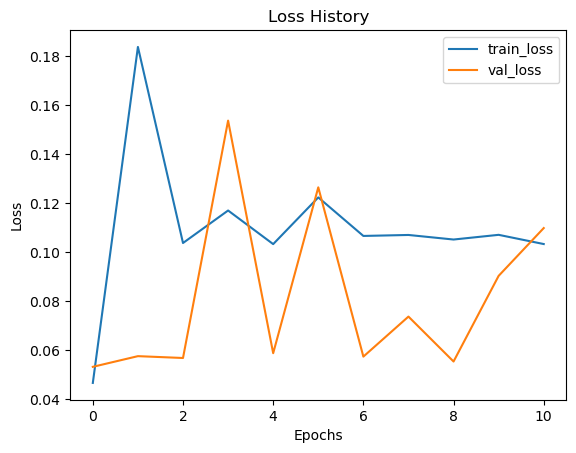

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

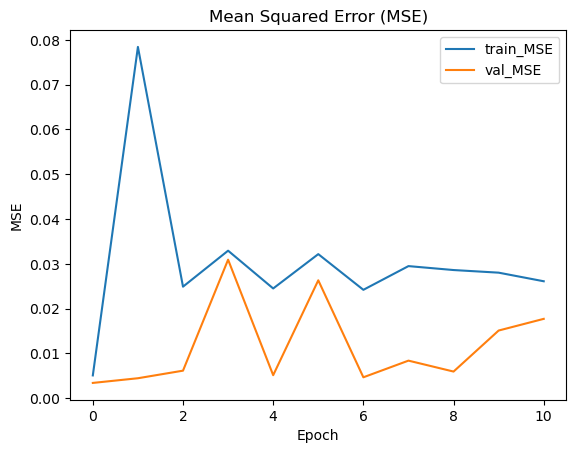

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

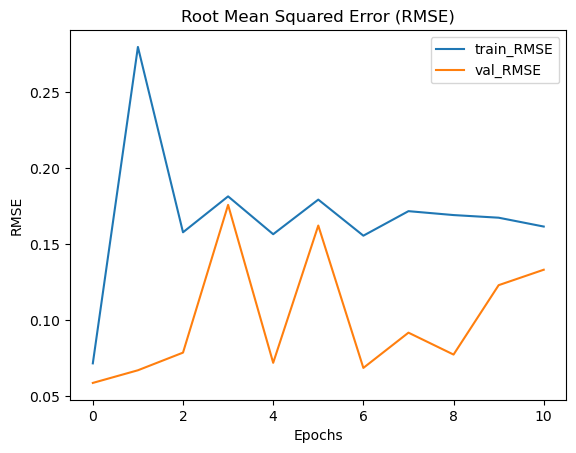

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

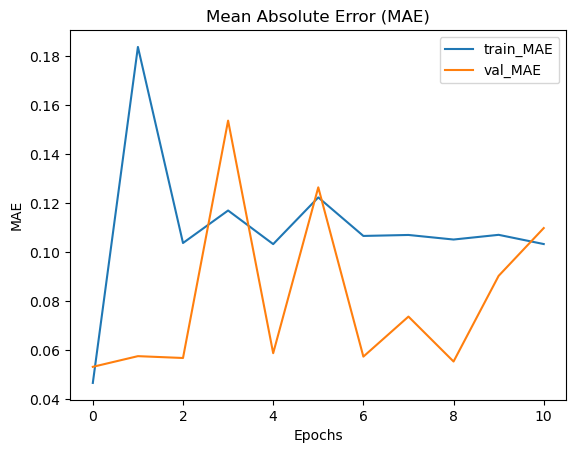

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

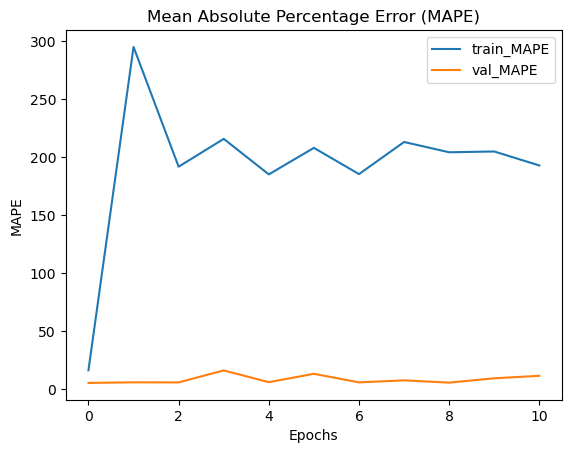

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 23:43:43.552766: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 3)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


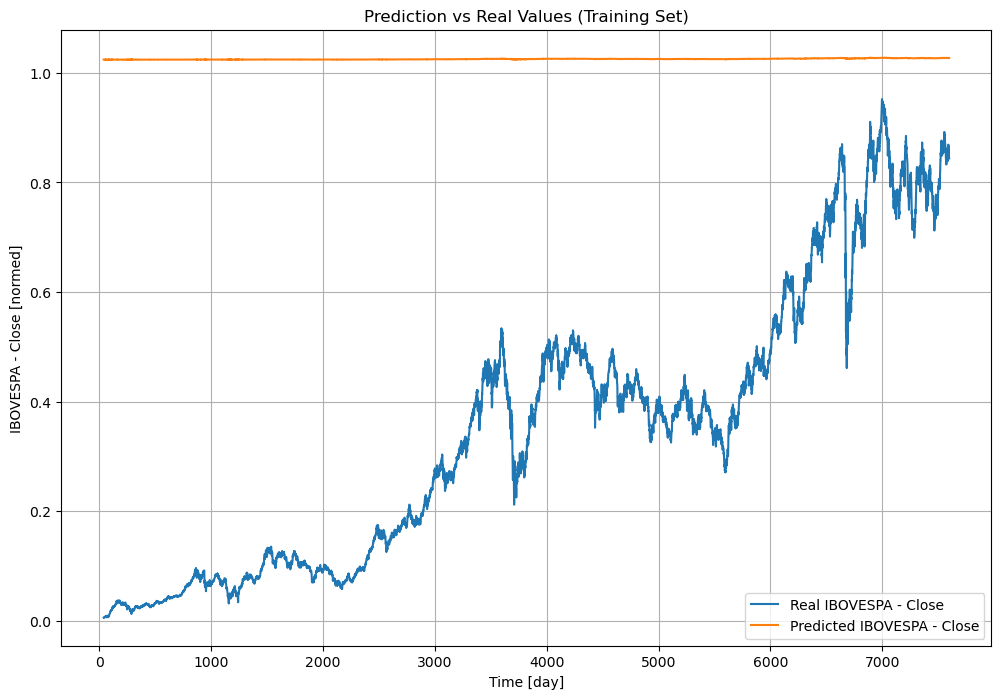

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 3)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


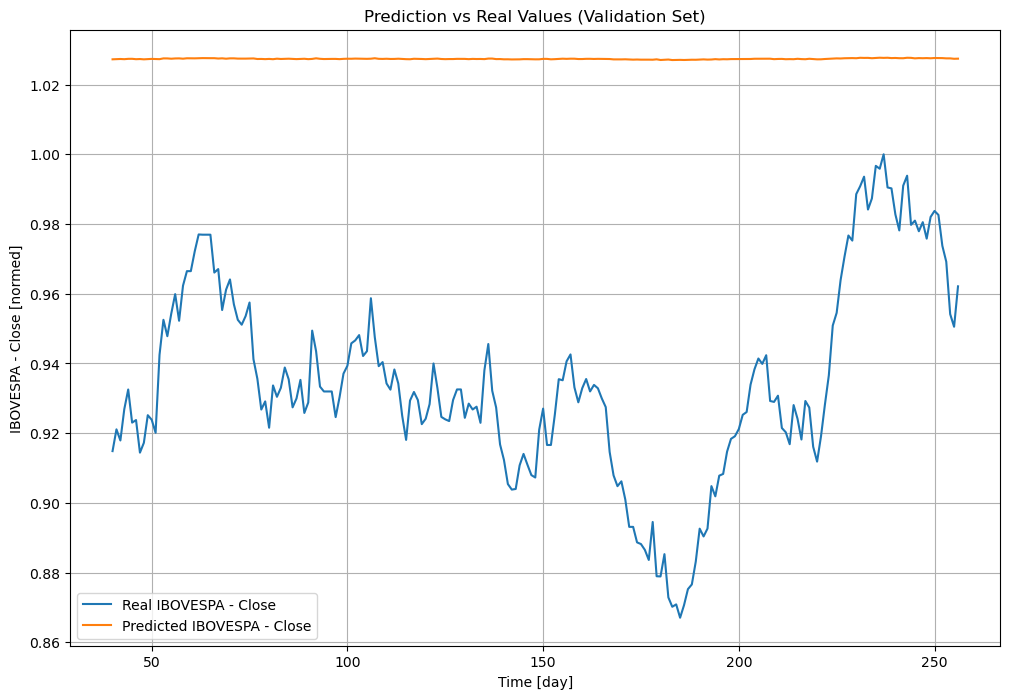

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 3)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


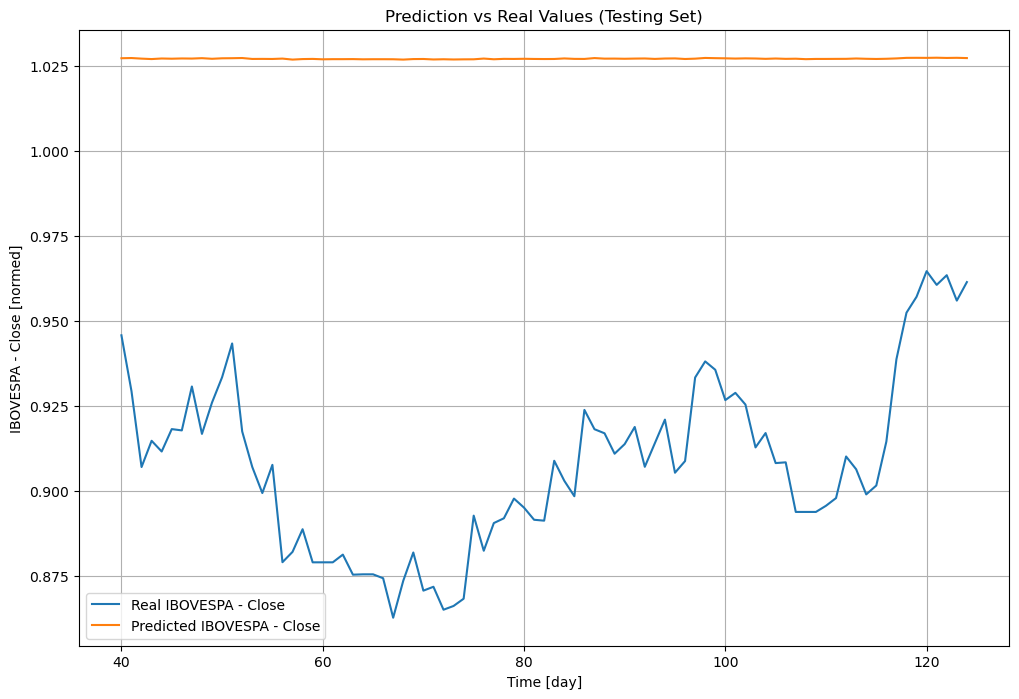

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

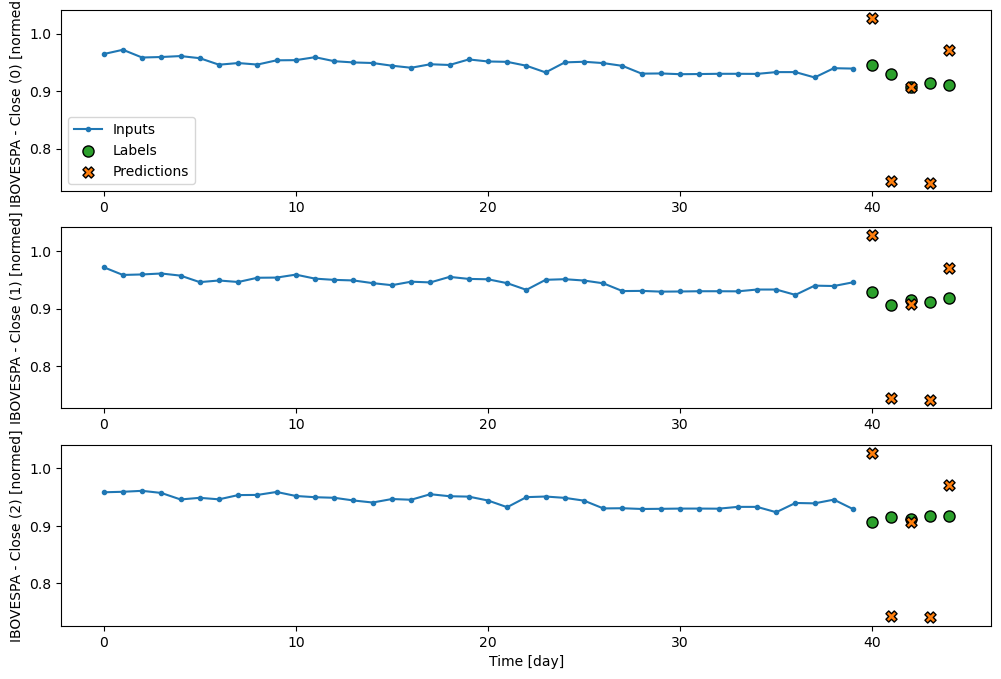

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:30s:579ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


array([[[1.0273842 , 1.0273842 , 1.0273842 , ..., 1.0273842 ,
         1.0273842 , 1.0273842 ],
        [0.74436665, 0.74436665, 0.74436665, ..., 0.74436665,
         0.74436665, 0.74436665],
        [0.9077484 , 0.9077484 , 0.9077484 , ..., 0.9077484 ,
         0.9077484 , 0.9077484 ],
        [0.7409233 , 0.7409233 , 0.7409233 , ..., 0.7409233 ,
         0.7409233 , 0.7409233 ],
        [0.9714135 , 0.9714135 , 0.9714135 , ..., 0.9714135 ,
         0.9714136 , 0.9714136 ]],

       [[1.0274432 , 1.0274432 , 1.0274432 , ..., 1.0274432 ,
         1.0274432 , 1.0274432 ],
        [0.7444246 , 0.7444246 , 0.7444246 , ..., 0.7444246 ,
         0.7444246 , 0.7444246 ],
        [0.90779245, 0.90779245, 0.90779245, ..., 0.90779245,
         0.90779245, 0.90779245],
        [0.74093425, 0.74093425, 0.74093425, ..., 0.74093425,
         0.74093425, 0.74093425],
        [0.971387  , 0.971387  , 0.971387  , ..., 0.971387  ,
         0.97138715, 0.97138715]],

       [[1.0272688 , 1.0272688 , 1.0

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')